In [105]:
import pandas as pd
import numpy as np

import ast
import copy

import scipy
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, levene

import sklearn

from sklearn.preprocessing import PowerTransformer

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB 

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, StratifiedKFold, RandomizedSearchCV, cross_validate , RepeatedKFold

from sklearn.feature_selection import f_classif, chi2, SelectKBest, RFECV

from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, roc_curve

from IPython.display import Image

from scipy.stats import randint

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)

In [2]:
def return_copies_of_variables(*args) -> list:

  return [copy.deepcopy(elem) for elem in args]

#<font color="green">1) First look at the data </font>

In [3]:
"""
description_df = pd.read_excel(io=r"/content/drive/MyDrive/Customers/dataset_description.xlsx")
print("Description DataFrame shape:", description_df.shape)
description_df.head(5)
"""
#-------------------------------------------------------------------------------

description_df = pd.read_excel(io=r"/content/drive/MyDrive/Customers/dataset_description.xlsx")
print("Description DataFrame shape:", description_df.shape)
description_df.head(5)

Description DataFrame shape: (58, 2)


Column_rename                                  Column_description
0               CUST_ID                                         customer id
1                 CHURN                 customer disconnection flag (churn)
2           AVG_REVENUE  average monthly revenue genereted by the customomr
3         AVG_USAGE_MIN                        average monthly minutes used
4  AVG_RECURRING_CHARGE                      average total recurring charge

In [4]:
"""
customers_df_test = pd.read_csv(filepath_or_buffer=r"/content/drive/MyDrive/Customers/test.csv")
print("Customers Testing DataFrame shape:", customers_df_test.shape)
customers_df_test.head(5)
"""
#-------------------------------------------------------------------------------

customers_df_test = pd.read_csv(filepath_or_buffer=r"/content/drive/MyDrive/Customers/test.csv")
print("Customers Testing DataFrame shape:", customers_df_test.shape)
customers_df_test.head(5)

Customers Testing DataFrame shape: (12762, 59)


Unnamed: 0  CustomerID Churn  MonthlyRevenue  MonthlyMinutes  \
0       30343     3241378   Yes           31.75           213.0   
1       46468     3367418    No          225.99          1384.0   
2       15839     3124386   Yes           35.82           862.0   
3       34111     3272054   Yes           65.31           730.0   
4       27804     3220138    No           89.63          1350.0   

   TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  RoamingCalls  \
0                  40.0                   0.00             5.0           0.1   
1                  49.0                   5.94           440.0           0.0   
2                  10.0                   5.69            68.0           0.0   
3                  60.0                   0.00            38.0           0.0   
4                  49.0                   2.72           157.0           0.1   

   PercChangeMinutes  PercChangeRevenues  DroppedCalls  BlockedCalls  \
0               -8.0                -1.8           0.3           4.3   
1               92.0                79.4          31.3           4.0   
2              180.0                23.1          14.7           0.7   
3              406.0                34.0           1.0          13.3   
4              246.0                21.8           8.3           4.7   

   UnansweredCalls  CustomerCareCalls  ThreewayCalls  ReceivedCalls  \
0              8.0                0.0            0.7           52.0   
1            119.0                1.3            0.7          401.6   
2             70.7                0.0            0.0          220.6   
3             19.3                0.7            0.0          172.0   
4             56.3                2.3            1.3          310.5   

   OutboundCalls  InboundCalls  PeakCallsInOut  OffPeakCallsInOut  \
0            9.3           2.0            43.0               30.3   
1          138.7          67.7           395.0              410.3   
2          105.3          65.7           139.7              139.7   
3           22.3          14.7           118.7               84.0   
4           63.3          13.0           128.3              241.7   

   DroppedBlockedCalls  CallForwardingCalls  CallWaitingCalls  \
0                  4.7                  0.0               0.0   
1                 35.3                  0.0              19.0   
2                 15.3                  0.0               0.0   
3                 14.3                  0.0               2.0   
4                 13.0                  0.0               9.7   

   MonthsInService  UniqueSubs  ActiveSubs ServiceArea  Handsets  \
0               15           3           2   NCRCHE757       1.0   
1               11           4           2   LAXANA714       2.0   
2               25           2           2   MIAMIA305       1.0   
3               13           1           1   NCRGRB757       2.0   
4               18           1           1   HOUHOU281       1.0   

   HandsetModels  CurrentEquipmentDays  AgeHH1  AgeHH2 ChildrenInHH  \
0            1.0                 419.0    38.0    40.0           No   
1            2.0                  37.0    22.0     0.0           No   
2            1.0                 738.0    46.0     0.0           No   
3            1.0                 293.0     0.0     0.0           No   
4            1.0                 519.0    52.0    36.0          Yes   

  HandsetRefurbished HandsetWebCapable TruckOwner RVOwner Homeownership  \
0                 No               Yes         No      No         Known   
1                Yes               Yes         No      No         Known   
2                Yes                No         No      No         Known   
3                 No               Yes         No      No       Unknown   
4                 No               Yes         No      No         Known   

  BuysViaMailOrder RespondsToMailOffers OptOutMailings NonUSTravel  \
0              Yes                  Yes             No          No   
1               No        

In [5]:
"""
customers_df = pd.read_csv(filepath_or_buffer=r"/content/drive/MyDrive/Customers/train.csv")
print("Customers Training DataFrame shape:", customers_df.shape)
customers_df.head(5)
"""
#-------------------------------------------------------------------------------

customers_df = pd.read_csv(filepath_or_buffer=r"/content/drive/MyDrive/Customers/train.csv")
print("Customers Training DataFrame shape:", customers_df.shape)
customers_df.head(5)

Customers Training DataFrame shape: (38285, 59)


Unnamed: 0  CustomerID Churn  MonthlyRevenue  MonthlyMinutes  \
0       36726     3293222   Yes           29.99             0.0   
1       21494     3168726    No           30.00           164.0   
2       44250     3350474    No           38.91           514.0   
3       32321     3257362   Yes           72.05           399.0   
4        8624     3068030    No           29.79            58.0   

   TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  RoamingCalls  \
0                  40.0                   0.00             0.0           0.0   
1                  30.0                   0.00             0.0           0.0   
2                  45.0                   0.00             1.0           3.7   
3                  51.0                   0.99            26.0           8.5   
4                  20.0                   0.00            24.0           0.0   

   PercChangeMinutes  PercChangeRevenues  DroppedCalls  BlockedCalls  \
0                0.0                 0.0           0.0           0.0   
1                3.0                 0.0           0.0           6.7   
2                0.0                -3.9           1.7           2.0   
3             -204.0               -16.2           5.7          12.0   
4               48.0                16.6           1.7           5.7   

   UnansweredCalls  CustomerCareCalls  ThreewayCalls  ReceivedCalls  \
0              0.0                0.0            0.0            0.0   
1             37.7               15.3            0.0            1.7   
2             37.0                0.0            0.0          123.5   
3             17.3                0.0            0.3          103.7   
4              3.0                0.0            0.3            1.8   

   OutboundCalls  InboundCalls  PeakCallsInOut  OffPeakCallsInOut  \
0            0.0           0.0             0.0                0.0   
1           24.7           0.0            47.7               41.3   
2           28.0           5.0            65.3               95.3   
3           38.0           0.7            74.3               81.0   
4            3.3           0.0            15.0                9.0   

   DroppedBlockedCalls  CallForwardingCalls  CallWaitingCalls  \
0                  0.0                  0.0               0.0   
1                  6.7                  5.0               0.0   
2                  3.7                  0.0               1.7   
3                 17.7                  0.0               0.7   
4                  7.3                  0.0               0.0   

   MonthsInService  UniqueSubs  ActiveSubs ServiceArea  Handsets  \
0               12           1           1   NYCMAN917       2.0   
1               19           1           1   FLNLEE352       1.0   
2               10           1           1   KCYWIC316       1.0   
3               16           1           1   OHHPAR304       1.0   
4               26           1           1   CHILAG630       1.0   

   HandsetModels  CurrentEquipmentDays  AgeHH1  AgeHH2 ChildrenInHH  \
0            1.0                 334.0    36.0    34.0           No   
1            1.0                 573.0    70.0    70.0           No   
2            1.0                 287.0    30.0     0.0           No   
3            1.0                 464.0     0.0     0.0           No   
4            1.0                 776.0    42.0     0.0          Yes   

  HandsetRefurbished HandsetWebCapable TruckOwner RVOwner Homeownership  \
0                 No               Yes         No      No         Known   
1                 No               Yes        Yes     Yes         Known   
2                 No               Yes         No      No         Known   
3                 No               Yes         No      No       Unknown   
4                 No                No         No      No         Known   

  BuysViaMailOrder RespondsToMailOffers OptOutMailings NonUSTravel  \
0              Yes                  Yes             No          No   
1               No        

In [6]:
"""
customers_df_initial_dtypes = customers_df.dtypes \
                                          .value_counts() \
                                          .to_frame()

customers_df_initial_dtypes.columns = ["number_of_columns"]

print("The 'customers_df' columns dtypes: ")
customers_df_initial_dtypes
"""
#-----------------------------------------------------------


def dtypes_counts(data_frame_: pd.DataFrame) -> pd.DataFrame:

  copies = return_copies_of_variables(data_frame_)
  data_frame = copies[0]

  data_frame = data_frame.dtypes \
                         .value_counts() \
                         .to_frame()
  
  data_frame.columns = ["number_of_columns"]

  return data_frame


customers_df_initial_dtypes = dtypes_counts(data_frame_=customers_df)

print("The 'customers_df' columns dtypes: ")
customers_df_initial_dtypes

The 'customers_df' columns dtypes: 


number_of_columns
float64                 26
object                  23
int64                   10

In [7]:
"""

  Some small conventions:
  -----------------------
  1) As a rule of thumb, a column name should always be lower cased and if the name is made out of multiple words, they should be separated by '_'
  2) In general, if the values that belong to a column are all strings, it's better to just lower case everything 


  Some 'first look' observations regarding the 'customers_df' DataFrame:
  ---------------------------------------------------------------------
  1) The first column "Unnamed: 0" is a pointless index from the csv
  2) The rest of the columns names are not in accordance with the 'description_df' DataFrame
  3) 23 columns are of dtype 'object'. 
     -> An 'object' dtype column accepts a mixture of strings, floats, ints and so on.
     -> Since it can accept all of these, it's going to be hard to distinguish between a float or an int or a string etc
     -> As a solution, I will check each of these columns and try to impose the appropriate dtype
  4) Some columns seem to be categorical, but they need some adjustments
  5) I suppose that the 'Unknown' values of the DataFrame are NANs. I will have to check that
  
"""

'\n\n  Some small conventions:\n  -----------------------\n  1) As a rule of thumb, a column name should always be lower cased and if the name is made out of multiple words, they should be separated by \'_\'\n  2) In general, if the values that belong to a column are all strings, it\'s better to just lower case everything \n\n\n  Some \'first look\' observations regarding the \'customers_df\' DataFrame:\n  ---------------------------------------------------------------------\n  1) The first column "Unnamed: 0" is a pointless index from the csv\n  2) The rest of the columns names are not in accordance with the \'description_df\' DataFrame\n  3) 23 columns are of dtype \'object\'. \n     -> An \'object\' dtype column accepts a mixture of strings, floats, ints and so on.\n     -> Since it can accept all of these, it\'s going to be hard to distinguish between a float or an int or a string etc\n     -> As a solution, I will check each of these columns and try to impose the appropriate dtype

In [8]:
"""
description_df.columns = description_df.columns.str.lower()

for col in description_df.columns:
  description_df.loc[:, col] = description_df.loc[:, col].str.lower()

description_df.head(5)
"""
#--------------------------------------------------------------------

description_df.columns = description_df.columns.str.lower()

for col in description_df.columns:
  description_df.loc[:, col] = description_df.loc[:, col].str.lower()

description_df.head(5)

column_rename                                  column_description
0               cust_id                                         customer id
1                 churn                 customer disconnection flag (churn)
2           avg_revenue  average monthly revenue genereted by the customomr
3         avg_usage_min                        average monthly minutes used
4  avg_recurring_charge                      average total recurring charge

In [9]:
"""
customers_df = customers_df.drop(columns="Unnamed: 0", inplace=False)

customers_df.columns = description_df.loc[:, "column_rename"].to_numpy()


customers_df_test = customers_df_test.drop(columns="Unnamed: 0", inplace=False)

customers_df_test.columns = description_df.loc[:, "column_rename"].to_numpy()


customers_df.head(5)
"""
#------------------------------------------------------------------------------

def drop_and_rename_columns(to_be_renamed_df_: pd.DataFrame, 
                            renaming_df_: pd.DataFrame) -> pd.DataFrame:

  copies = return_copies_of_variables(to_be_renamed_df_, renaming_df_)

  to_be_renamed_df, renaming_df = copies

  to_be_renamed_df = to_be_renamed_df.drop(columns="Unnamed: 0", 
                                           inplace=False)

  to_be_renamed_df.columns = renaming_df.loc[:, "column_rename"].to_numpy()

  return to_be_renamed_df


customers_df = drop_and_rename_columns(to_be_renamed_df_=customers_df, 
                                       renaming_df_=description_df)

customers_df_test = drop_and_rename_columns(to_be_renamed_df_=customers_df_test, 
                                            renaming_df_=description_df)

customers_df.head(5)

cust_id churn  avg_revenue  avg_usage_min  avg_recurring_charge  \
0  3293222   Yes        29.99            0.0                  40.0   
1  3168726    No        30.00          164.0                  30.0   
2  3350474    No        38.91          514.0                  45.0   
3  3257362   Yes        72.05          399.0                  51.0   
4  3068030    No        29.79           58.0                  20.0   

   no_calls_dir_assisted  avg_usage_overbundle_min  avg_roaming_calls  \
0                   0.00                       0.0                0.0   
1                   0.00                       0.0                0.0   
2                   0.00                       1.0                3.7   
3                   0.99                      26.0                8.5   
4                   0.00                      24.0                0.0   

   per_change_min  per_change_revenue  avg_dropped_calls  avg_blocked_calls  \
0             0.0                 0.0                0.0                0.0   
1             3.0                 0.0                0.0                6.7   
2             0.0                -3.9                1.7                2.0   
3          -204.0               -16.2                5.7               12.0   
4            48.0                16.6                1.7                5.7   

   avg_unanswered_calls  avg_customer_care_calls  avg_conference_calls  \
0                   0.0                      0.0                   0.0   
1                  37.7                     15.3                   0.0   
2                  37.0                      0.0                   0.0   
3                  17.3                      0.0                   0.3   
4                   3.0                      0.0                   0.3   

   avg_unrounded_min_received_calls  avg_outbound_calls  avg_inbound_calls  \
0                               0.0                 0.0                0.0   
1                               1.7                24.7                0.0   
2                             123.5                28.0                5.0   
3                             103.7                38.0                0.7   
4                               1.8                 3.3                0.0   

   avg_in_out_peak_hour_calls  avg_in_out_offpeak_hour_calls  \
0                         0.0                            0.0   
1                        47.7                           41.3   
2                        65.3                           95.3   
3                        74.3                           81.0   
4                        15.0                            9.0   

   avg_dropped_blocked_calls  avg_call_forward_calls  avg_call_waiting_calls  \
0                        0.0                     0.0                     0.0   
1                        6.7                     5.0                     0.0   
2                        3.7                     0.0                     1.7   
3                       17.7                     0.0                     0.7   
4                        7.3                     0.0                     0.0   

   cust_tenure  no_unique_subs  no_active_subs service_area  no_handsets  \
0           12               1               1    NYCMAN917          2.0   
1           19               1               1    FLNLEE352          1.0   
2           10               1               1    KCYWIC316          1.0   
3           16               1               1    OHHPAR304          1.0   
4           26               1               1    CHILAG630          1.0   

   no_handset_models  no_days_current_device  age_hh_1  age_hh_2  \
0                1.0                   334.0      36.0      34.0   
1                1.0                   573.0      70.0      70.0   
2                1.0                   287.0      30.0       0.0   
3                1.0                   464.0       0.0       0.0   
4                1.0                   776.0      42.0       0.0   

  children_hh_fl hds_r

In [10]:
"""
  As seen in the following DataFrame, some columns contain NANs.
  However, the 'isna()' method only detects np.nan/pd.NA values.

  As I've seen at the beginning of the notebook, there are also some 'Unknown' strings present in a few columns.
  I will have to check them manually and decide if I consider them NANs!
"""

"""
nans_per_column_df = customers_df.isna().sum(axis=0).to_frame().T
print("Number of NANs per columns in training set:")
nans_per_column_df
"""
#------------------------------------------------------------------------------


def nans_per_column(data_frame_: pd.DataFrame) -> pd.DataFrame:
  
  copies = return_copies_of_variables(data_frame_)

  data_frame = copies[0]

  nans_per_column_df = data_frame.isna().sum(axis=0).to_frame().T

  return nans_per_column_df


nans_per_column_df = nans_per_column(data_frame_=customers_df)

print("Number of NANs per columns in training set:")

nans_per_column_df

Number of NANs per columns in training set:


cust_id  churn  avg_revenue  avg_usage_min  avg_recurring_charge  \
0        0      0          116            116                   116   

   no_calls_dir_assisted  avg_usage_overbundle_min  avg_roaming_calls  \
0                    116                       116                116   

   per_change_min  per_change_revenue  avg_dropped_calls  avg_blocked_calls  \
0             265                 265                  0                  0   

   avg_unanswered_calls  avg_customer_care_calls  avg_conference_calls  \
0                     0                        0                     0   

   avg_unrounded_min_received_calls  avg_outbound_calls  avg_inbound_calls  \
0                                 0                   0                  0   

   avg_in_out_peak_hour_calls  avg_in_out_offpeak_hour_calls  \
0                           0                              0   

   avg_dropped_blocked_calls  avg_call_forward_calls  avg_call_waiting_calls  \
0                          0                       0                       0   

   cust_tenure  no_unique_subs  no_active_subs  service_area  no_handsets  \
0            0               0               0            19            1   

   no_handset_models  no_days_current_device  age_hh_1  age_hh_2  \
0                  1                       1       684       684   

   children_hh_fl  hds_refurbished_fl  hds_web_capable_fl  truck_owner  \
0               0                   0                   0            0   

   rv_owner  home_owner  email_buy  email_offers_resp  email_opt_out  \
0         0           0          0                  0              0   

   non_us_travel  computer_owner  credit_card_fl  retention_calls  \
0              0               0               0                0   

   retention_offer_acc  new_mobile_hds_user  not_new_mobile_hds_user  \
0                    0                    0                        0   

   no_referrals_made  income_segment  moto_owner  no_credit_rate_adj  \
0                  0               0           0                   0   

   handset_price  calls_to_retentetion  credit_rate  area_type  ocupatiion  \
0              0                     0            0          0           0   

   marital_status  
0               0

In [11]:
nans_per_column_df_test = nans_per_column(data_frame_=customers_df_test)

print("Number of NANs per columns in testing set:")

nans_per_column_df_test

Number of NANs per columns in testing set:


cust_id  churn  avg_revenue  avg_usage_min  avg_recurring_charge  \
0        0      0           40             40                    40   

   no_calls_dir_assisted  avg_usage_overbundle_min  avg_roaming_calls  \
0                     40                        40                 40   

   per_change_min  per_change_revenue  avg_dropped_calls  avg_blocked_calls  \
0             102                 102                  0                  0   

   avg_unanswered_calls  avg_customer_care_calls  avg_conference_calls  \
0                     0                        0                     0   

   avg_unrounded_min_received_calls  avg_outbound_calls  avg_inbound_calls  \
0                                 0                   0                  0   

   avg_in_out_peak_hour_calls  avg_in_out_offpeak_hour_calls  \
0                           0                              0   

   avg_dropped_blocked_calls  avg_call_forward_calls  avg_call_waiting_calls  \
0                          0                       0                       0   

   cust_tenure  no_unique_subs  no_active_subs  service_area  no_handsets  \
0            0               0               0             5            0   

   no_handset_models  no_days_current_device  age_hh_1  age_hh_2  \
0                  0                       0       225       225   

   children_hh_fl  hds_refurbished_fl  hds_web_capable_fl  truck_owner  \
0               0                   0                   0            0   

   rv_owner  home_owner  email_buy  email_offers_resp  email_opt_out  \
0         0           0          0                  0              0   

   non_us_travel  computer_owner  credit_card_fl  retention_calls  \
0              0               0               0                0   

   retention_offer_acc  new_mobile_hds_user  not_new_mobile_hds_user  \
0                    0                    0                        0   

   no_referrals_made  income_segment  moto_owner  no_credit_rate_adj  \
0                  0               0           0                   0   

   handset_price  calls_to_retentetion  credit_rate  area_type  ocupatiion  \
0              0                     0            0          0           0   

   marital_status  
0               0

In [12]:
"""
print("The output column in training set:")
customers_df["churn"].value_counts().to_frame().T.rename({"churn": "churn_counts"}, axis=1)
"""
#-------------------------------------------------------------------------------

def column_counts(data_frame_: pd.DataFrame, col_: str) -> pd.DataFrame:

  copies = return_copies_of_variables(data_frame_, col_)

  data_frame, col = copies

  return data_frame[col].value_counts() \
                        .to_frame() \
                        .rename({col: col + "_counts"}, axis=1)


print("The output column in training set:")

column_counts(data_frame_=customers_df, col_="churn")

The output column in training set:


churn_counts
No          27252
Yes         11033

In [13]:
"""
print("The output column in testing set:")
customers_df_test["churn"].value_counts().to_frame().T.rename({"churn": "churn_counts"}, axis=1)
"""
#-------------------------------------------------------------------------------

print("The output column in testing set:")

column_counts(data_frame_=customers_df_test, col_="churn")

The output column in testing set:


churn_counts
No           9084
Yes          3678

In [14]:
print(len(customers_df['service_area'].unique()))
print(len(customers_df_test['service_area'].unique()))

721
614


In [15]:
"""

  Boolean Columns
  ----------------
  By looking at the printed data from below, I can see that there are many 'object' dtype columns whose values belong to the {'Yes', 'No'} set.
  It is pretty clear that these columns are nothing but boolean columns, where No=False and Yes=True
  Moreover, some of them have names that end in '_fl' which strenghtens my intuition even more.

  All the columns that are boolean will have their dtype changed from 'object' to 'boolean'


  Categorical Columns:
  --------------------
  Categorical data can be splitted in 2 ways:

    -> Categorical Nominal Data (that can not be arranged)
      * The nominal categorical columns seem to be: 'area_type', 'ocupatiion', 'service_area', 'home_owner'
      
    -> Categorical Ordinal Data (that can be arranged according to a specific order)
      * In this case, 'credit_rate' is definitely an ordinal categorical column, as suggested by its values
      * 'handset_price' also seem to be ordinal categorical (?)

  All the columns that are categorical will have their dtype changed from 'object' to 'category'


  Missing values?
  ---------------
  "Unknown" string is present in 'handset_price', 'home_owner', 'marital_status'
  
  'service_area' has lots of categoties; among them, I also saw a nan value, so I will analyse it separately

"""


"""
object_dtype_columns = customers_df.dtypes.loc[customers_df.dtypes == "object"].index.tolist()

dict_object_dtype_columns = dict()

for object_dtype_col in object_dtype_columns:
  dict_object_dtype_columns[object_dtype_col] = customers_df.loc[:, object_dtype_col].unique()

dict_object_dtype_columns
"""
#-------------------------------------------------------------------------------

def unique_values_per_object_columns(data_frame_: pd.DataFrame) -> dict:

  copies = return_copies_of_variables(data_frame_)

  data_frame = copies[0]

  object_dtype_columns = data_frame.dtypes.loc[data_frame.dtypes == "object"].index.tolist()

  dict_object_dtype_columns = dict()

  for object_dtype_col in object_dtype_columns:
    dict_object_dtype_columns[object_dtype_col] = data_frame.loc[:, object_dtype_col].unique()

  return dict_object_dtype_columns


dict_object_dtype_columns = unique_values_per_object_columns(data_frame_=customers_df)
dict_object_dtype_columns

{'area_type': array(['Other', 'Rural', 'Suburban', 'Town'], dtype=object),
 'calls_to_retentetion': array(['No', 'Yes'], dtype=object),
 'children_hh_fl': array(['No', 'Yes'], dtype=object),
 'churn': array(['Yes', 'No'], dtype=object),
 'computer_owner': array(['No', 'Yes'], dtype=object),
 'credit_card_fl': array(['Yes', 'No'], dtype=object),
 'credit_rate': array(['1-Highest', '3-Good', '2-High', '4-Medium', '5-Low', '6-VeryLow',
        '7-Lowest'], dtype=object),
 'email_buy': array(['Yes', 'No'], dtype=object),
 'email_offers_resp': array(['Yes', 'No'], dtype=object),
 'email_opt_out': array(['No', 'Yes'], dtype=object),
 'handset_price': array(['130', 'Unknown', '200', '30', '10', '150', '60', '80', '100',
        '40', '400', '250', '240', '500', '300', '180'], dtype=object),
 'hds_refurbished_fl': array(['No', 'Yes'], dtype=object),
 'hds_web_capable_fl': array(['Yes', 'No'], dtype=object),
 'home_owner': array(['Known', 'Unknown'], dtype=object),
 'marital_status': array(['No

In [16]:
"""
  Here I am taking care of the 'object' dtype columns that seem to be BOOLEAN!
  ----------------------------------------------------------------------------

  The 'len(item[1]) == 2' condition is imposed because I only want to convert the columns that don't have the "Unknown" string present in them
  The columns with the "Unknown" string will be analysed separately (in this case, only 'marital_status')
"""


"""
boolean_cols = [item[0] for item in dict_object_dtype_columns.items() 
                if "No" in item[1] and "Yes" in item[1] and len(item[1]) == 2]

for boolean_col in boolean_cols:

  customers_df.loc[:, boolean_col] = customers_df.loc[:, boolean_col].map(lambda elem: False if elem == "No" else True) \
                                                                     .astype(pd.BooleanDtype())
"""


def convert_to_boolean_columns(data_frame_: pd.DataFrame, 
                               dict_object_dtype_columns_: dict) -> pd.DataFrame:

  copies = return_copies_of_variables(data_frame_, dict_object_dtype_columns_)

  data_frame, dict_object_dtype_columns = copies
  
  boolean_cols = [item[0] for item in dict_object_dtype_columns.items() 
                  if "No" in item[1] and "Yes" in item[1] and len(item[1]) == 2]

  for boolean_col in boolean_cols:

    data_frame.loc[:, boolean_col] = data_frame.loc[:, boolean_col].map(lambda elem: False if elem == "No" else True) \
                                                                   .astype(pd.BooleanDtype())
  
  return [boolean_cols, data_frame]


boolean_cols, customers_df_test = convert_to_boolean_columns(data_frame_=customers_df_test, 
                                                             dict_object_dtype_columns_=dict_object_dtype_columns)


boolean_cols, customers_df = convert_to_boolean_columns(data_frame_=customers_df, 
                                                        dict_object_dtype_columns_=dict_object_dtype_columns)

In [17]:
"""
  The marital_status of a lot of customers is 'unknown'!
  

  Normally, these 'unknown' values would be considered nans and should be replaced with a Yes or a No according to a data imputation method.
  

  However, in this case, there seems to be a PATTERN OF MISSINGNESS.
  -----------------------------------------------------------------
    -> Why?
      *** A big part of the customers may not find it appropriate to reveal information regarding their marital status

    -> What to do then?
      1) I will treat the 'Unknown' string in this column as a plausible value
      2) By doing this, 'marital_status' will be considered a NOMINAL CATEGORICAL variable with 3 categories {"yes", "no", "unknown"}
  

  P.S.: In general, when there's a pattern of missingness, I try not to replace the missing values. 
"""

column_counts(data_frame_=customers_df, col_="marital_status")

marital_status_counts
Unknown                  14689
Yes                      14032
No                        9564

In [18]:
"""
  Here I am taking care of the 'object' dtype columns that seem to be NOMINAL CATEGORICAL or ORDINAL CATEGORICAL!
  ---------------------------------------------------------------------------------------------------------------
    

    -> NOMINAL CATEGORICAL: 'area_type', 'ocupatiion', 'service_area', 'home_owner', 'marital_status' (please note the newly added 'marital_status', as suggested by my previous notebook cell comments)

       *** 'service_area' has lots of categoties; among them, I also saw a few nan values, so I will analyse it separately
       *** 'home_owner' contains 'Unknown', hence, as said earlier, the columns with the "Unknown" string will be analysed separately


    -> ORDINAL CATEGORICAL: 'credit_rate', 'handset_price'

       *** 'handset_price' contains 'Unknown', hence it will be analysed separately
"""


nominal_categorical_cols = ["area_type", "ocupatiion", "marital_status", "service_area", "home_owner"]

ordinal_categorical_cols = ["credit_rate", "handset_price"]

categorical_cols = {"nominal": nominal_categorical_cols, "ordinal": ordinal_categorical_cols}

for nominal_categorical_col in categorical_cols["nominal"][:3]:
  customers_df.loc[:, nominal_categorical_col] = pd.Categorical(values=customers_df.loc[:, nominal_categorical_col].str.lower().to_numpy(), 
                                                                categories=map(lambda elem: elem.lower(), dict_object_dtype_columns[nominal_categorical_col]), 
                                                                ordered=False)

customers_df.loc[:, "credit_rate"] = pd.Categorical(values=customers_df.loc[:, "credit_rate"].str.lower().str.replace("-", "_").to_numpy(), 
                                                    categories=sorted(map(lambda elem: elem.lower().replace("-", "_"), dict_object_dtype_columns["credit_rate"])), 
                                                    ordered=True)


for nominal_categorical_col in categorical_cols["nominal"][:3]:
  customers_df_test.loc[:, nominal_categorical_col] = pd.Categorical(values=customers_df_test.loc[:, nominal_categorical_col].str.lower().to_numpy(), 
                                                                categories=map(lambda elem: elem.lower(), dict_object_dtype_columns[nominal_categorical_col]), 
                                                                ordered=False)

customers_df_test.loc[:, "credit_rate"] = pd.Categorical(values=customers_df_test.loc[:, "credit_rate"].str.lower().str.replace("-", "_").to_numpy(), 
                                                    categories=sorted(map(lambda elem: elem.lower().replace("-", "_"), dict_object_dtype_columns["credit_rate"])), 
                                                    ordered=True)

#-------------------------------------------------------------------------------

# def convert_to_categorical_columns(data_frame_: pd.DataFrame, 
#                                    nominal_categorical_cols_: list,
#                                    ordinal_categorical_cols_: list,
#                                    dict_object_dtype_columns_: dict) -> pd.DataFrame:
  
#   copies = return_copies_of_variables(data_frame_, nominal_categorical_cols_, 
#                                       ordinal_categorical_cols_, dict_object_dtype_columns_)

#   data_frame, nominal_categorical_cols, ordinal_categorical_cols, dict_object_dtype_columns = copies

#   categorical_cols = {"nominal": nominal_categorical_cols, 
#                       "ordinal": ordinal_categorical_cols}
  
#   for nominal_categorical_col in categorical_cols["nominal"]:
#     data_frame.loc[:, nominal_categorical_col] = pd.Categorical(values=data_frame.loc[:, nominal_categorical_col].str.lower().to_numpy(), 
#                                                                 categories=map(lambda elem: elem.lower(), dict_object_dtype_columns[nominal_categorical_col]), 
#                                                                 ordered=False)
  
#   for ordinal_categorical_col in categorical_cols["ordinal"]:
#     data_frame.loc[:, ordinal_categorical_col] = pd.Categorical(values=data_frame.loc[:, ordinal_categorical_col].str.lower().str.replace("-", "_").to_numpy(), 
#                                                                 categories=sorted(map(lambda elem: elem.lower().replace("-", "_"), dict_object_dtype_columns[ordinal_categorical_col])), 
#                                                                 ordered=True)
  
#   return [data_frame, categorical_cols]


# nominal_categorical_cols = ["area_type", "ocupatiion", "marital_status", "service_area", "home_owner"]

# ordinal_categorical_cols = ["credit_rate", "handset_price"]


# customers_df_test, categorical_cols = convert_to_categorical_columns(data_frame_=customers_df_test, 
#                                                                      nominal_categorical_cols_=nominal_categorical_cols[:3],
#                                                                      ordinal_categorical_cols_=ordinal_categorical_cols[:1],
#                                                                      dict_object_dtype_columns_=dict_object_dtype_columns)

# customers_df, categorical_cols = convert_to_categorical_columns(data_frame_=customers_df, 
#                                                                 nominal_categorical_cols_=nominal_categorical_cols[:3],
#                                                                 ordinal_categorical_cols_=ordinal_categorical_cols[:1],
#                                                                 dict_object_dtype_columns_=dict_object_dtype_columns)

In [19]:
"""
  Once again, there's certaintly a PATTERN OF MISSINGNESS here.
  ------------------------------------------------------------ 


  -> Why?
    *** A big part of the customers may not feel it's necessary to provide information regarding the price of their phones
    *** Maybe, they could think that giving such details would make their services provider more prone to telling them about expensive offers

  -> What to do?
    ***  Again, I will treat the 'Unknown' string in this column as a plausible value
"""


column_counts(data_frame_=customers_df, col_="handset_price")

handset_price_counts
Unknown                 21768
30                       5459
150                      3071
130                      1575
80                       1480
10                       1450
60                       1337
100                       940
200                       939
40                        191
400                        34
250                        15
300                         8
180                         7
500                         6
240                         5

In [20]:
handset_price_ordered_cat = sorted([price for price in dict_object_dtype_columns["handset_price"] if price != "Unknown"], 
                                   key=lambda price: ast.literal_eval(price)) + ["unknown"]

customers_df.loc[:, "handset_price"] = pd.Categorical(values=customers_df.loc[:, "handset_price"].str.lower().to_numpy(), 
                                                      categories=handset_price_ordered_cat, 
                                                      ordered=True)

customers_df_test.loc[:, "handset_price"] = pd.Categorical(values=customers_df_test.loc[:, "handset_price"].str.lower().to_numpy(), 
                                                           categories=handset_price_ordered_cat, 
                                                           ordered=True)

In [21]:
"""
   I don't really understand what 'home_owner' column means. 
   In the description it says that it represents if the 'home owner is missing'.
   However, I don't really know what that is. 

   Anyway, I will transform it into a categorical variable!
"""

column_counts(data_frame_=customers_df, col_="home_owner")

home_owner_counts
Known                25585
Unknown              12700

In [22]:
customers_df.loc[:, "home_owner"] = pd.Categorical(values=customers_df.loc[:, "home_owner"].str.lower().to_numpy(), 
                                                   categories=map(lambda elem: elem.lower(), dict_object_dtype_columns["home_owner"]), 
                                                   ordered=False)

customers_df_test.loc[:, "home_owner"] = pd.Categorical(values=customers_df_test.loc[:, "home_owner"].str.lower().to_numpy(), 
                                                        categories=map(lambda elem: elem.lower(), dict_object_dtype_columns["home_owner"]), 
                                                        ordered=False)

In [23]:
"""

  At the beginning of the notebook, I created a 'nans_per_columns_df' DataFrame
  If you look at the 'service_area' column of that DataFrame, you will see that there are only 19 nans
  Given that the number is very small, compared to the sizes of the training set, I choose to simply drop those lines and not bother with them anymore

  P.S.: I know that in general it's not advisable to drop the lines associated to nan values in a column, but in this case I think it should be fine\
  
"""

customers_df.dropna(subset=["service_area"], inplace=True)

customers_df_test.dropna(subset=["service_area"], inplace=True)

customers_df.loc[:, "service_area"] = pd.Categorical(values=customers_df.loc[:, "service_area"].to_numpy(), 
                                                     categories=customers_df.loc[:, "service_area"].unique(), 
                                                     ordered=False)

customers_df_test.loc[:, "service_area"] = pd.Categorical(values=customers_df_test.loc[:, "service_area"].to_numpy(), 
                                                          categories=customers_df_test.loc[:, "service_area"].unique(), 
                                                          ordered=False)

In [24]:
"""

  I will also change the dtypes of int and float columns

  From what I see, numpy dtypes are used -a.k.a- int64 and float64
  
  I want pandas nullable dtypes Int64Dtype and Float64Dtype         

"""

def convert_int_to_pandas_dtype_int(data_frame_: pd.DataFrame) -> pd.DataFrame:

  copies = return_copies_of_variables(data_frame_)

  data_frame = copies[0]

  for int_column in data_frame.loc[:, data_frame.dtypes == "int64"].columns:
    data_frame.loc[:, int_column] = data_frame.loc[:, int_column].astype(pd.Int64Dtype())
  
  return data_frame


def convert_float_to_pandas_dtype_float(data_frame_: pd.DataFrame) -> pd.DataFrame:

  copies = return_copies_of_variables(data_frame_)
  
  data_frame = copies[0]

  for float_columns in data_frame.loc[:, data_frame.dtypes == "float64"].columns:
    data_frame.loc[:, float_columns] = data_frame.loc[:, float_columns].astype(pd.Float64Dtype())
    
  return data_frame


customers_df = convert_int_to_pandas_dtype_int(data_frame_=customers_df)
customers_df = convert_float_to_pandas_dtype_float(data_frame_=customers_df)

customers_df_test = convert_int_to_pandas_dtype_int(data_frame_=customers_df_test)
customers_df_test = convert_float_to_pandas_dtype_float(data_frame_=customers_df_test)

In [25]:
"""

  The 'cust_id' column should be converted to string dtype, since IDs are in general just long sequences of characters, rather than numbers

"""

customers_df.loc[:, "cust_id"] = customers_df.loc[:, "cust_id"].astype(pd.StringDtype())

customers_df_test.loc[:, "cust_id"] = customers_df_test.loc[:, "cust_id"].astype(pd.StringDtype())

In [ ]:
""" 
	avg_revenue	avg_usage_min	avg_recurring_charge	no_calls_dir_assisted	avg_usage_overbundle_min	avg_roaming_calls all of them are nan at the same time 
  per_change_min	per_change_revenue	all of them are nan at the same time
  age_hh_1	age_hh_2 all of them are nan at the same time

  check correlations maybe??
"""

In [27]:
print(customers_df_test.shape)
customers_df.dropna(axis=0, how="any", subset=customers_df.columns, inplace=True)
customers_df_test.dropna(axis=0, how="any", subset=customers_df_test.columns, inplace=True)
print(customers_df_test.shape)

(12757, 58)
(12433, 58)


In [28]:
"""

  I would like to take a closer look at the numerical columns of the 'customers_df' DataFrame.

  Sometimes, a discrete|continous numerical column might actually be a categorical column if its range of values is really small and finite.

  It has been EMPIRICALLY stated by a few statisticians that a column which has its range of unique values <= 10 in a large sample should be analysed in order to decide if it's actually a categorical one 

  ------------------------------------------------------------------------------

  Among the 4 printed numerical columns that seem to be categorical, only 'income_segment' might be truly ordinal categorical, given its description in the 'description_df' DataFrame
    -> Therefore, I will make it categorical

"""

int_columns = customers_df.dtypes.loc[(customers_df.dtypes == "Int64")].index.to_numpy()

float_columns = customers_df.dtypes.loc[(customers_df.dtypes == "Float64")].index.to_numpy()

numerical_cols = np.append(int_columns, float_columns)

nr_of_unique_vals_per_numerical_col = dict()

for numerical_col in numerical_cols:
  nr_of_unique_vals_per_numerical_col[numerical_col] = customers_df.loc[:, numerical_col].unique().shape[0]

[key for key, value in nr_of_unique_vals_per_numerical_col.items() if value <= 10]

['no_active_subs', 'retention_calls', 'retention_offer_acc', 'income_segment']

In [29]:
customers_df.loc[:, "income_segment"] = pd.Categorical(values=customers_df.loc[:, "income_segment"].to_numpy(), 
                                                       categories=sorted(customers_df.loc[:, "income_segment"].unique()), 
                                                       ordered=True)

customers_df_test.loc[:, "income_segment"] = pd.Categorical(values=customers_df_test.loc[:, "income_segment"].to_numpy(), 
                                                            categories=sorted(customers_df_test.loc[:, "income_segment"].unique()), 
                                                            ordered=True)

#<font color="green">2) Exploratory Data Analysis</font>

In [30]:
from matplotlib import pyplot as plt
import copy
plt.rcdefaults()

In [31]:
numerical_cols = np.delete(numerical_cols, np.where(numerical_cols == "income_segment")[0][0])
categorical_cols["ordinal"].append("income_segment")

In [32]:
numerical_df = copy.deepcopy(customers_df.loc[:, numerical_cols])
numerical_df_test = copy.deepcopy(customers_df_test.loc[:, numerical_cols])

boolean_df = copy.deepcopy(customers_df.loc[:, boolean_cols])
boolean_df_test = copy.deepcopy(customers_df_test.loc[:, boolean_cols])

categorical_df = copy.deepcopy(customers_df.loc[:, categorical_cols["nominal"] + categorical_cols["ordinal"]])
categorical_df_test = copy.deepcopy(customers_df_test.loc[:, categorical_cols["nominal"] + categorical_cols["ordinal"]])

In [33]:
basic_stats = numerical_df.describe()
basic_stats

cust_tenure  no_unique_subs  no_active_subs  retention_calls  \
count  37319.000000    37319.000000    37319.000000     37319.000000   
mean      18.750342        1.526300        1.351430         0.035853   
std        9.754051        0.863879        0.628563         0.204328   
min        6.000000        1.000000        0.000000         0.000000   
25%       11.000000        1.000000        1.000000         0.000000   
50%       16.000000        1.000000        1.000000         0.000000   
75%       24.000000        2.000000        2.000000         0.000000   
max       60.000000       18.000000       11.000000         4.000000   

       retention_offer_acc  no_referrals_made  no_credit_rate_adj  \
count         37319.000000       37319.000000        37319.000000   
mean              0.018489           0.051609            0.054315   
std               0.144132           0.261229            0.392084   
min               0.000000           0.000000            0.000000   
25%               0.000000           0.000000            0.000000   
50%               0.000000           0.000000            0.000000   
75%               0.000000           0.000000            0.000000   
max               3.000000          11.000000           25.000000   

        avg_revenue  avg_usage_min  avg_recurring_charge  \
count  37319.000000   37319.000000          37319.000000   
mean      58.667134     526.114660             46.785873   
std       44.400056     531.298206             23.733985   
min       -6.170000       0.000000             -6.000000   
25%       33.510000     159.000000             30.000000   
50%       48.300000     366.000000             45.000000   
75%       70.890000     724.000000             60.000000   
max     1223.380000    7359.000000            400.000000   

       no_calls_dir_assisted  avg_usage_overbundle_min  avg_roaming_calls  \
count           37319.000000              37319.000000       37319.000000   
mean                0.895260                 39.928133           1.249321   
std                 2.279629                 97.198087          10.517167   
min                 0.000000                  0.000000           0.000000   
25%                 0.000000                  0.000000           0.000000   
50%                 0.250000                  3.000000           0.000000   
75%                 0.990000                 41.000000           0.300000   
max               159.390000               4321.000000        1112.400000   

       per_change_min  per_change_revenue  avg_dropped_calls  \
count    37319.000000        37319.000000       37319.000000   
mean       -12.385407           -1.360797           6.006994   
std        257.830937           38.406505           9.004483   
min      -3875.000000        -1107.700000           0.000000   
25%        -84.000000           -7.100000           0.700000   
50%         -5.000000           -0.300000           3.000000   
75%         65.000000            1.650000           7.700000   
max       5192.000000         2483.500000         221.700000   

       avg_blocked_calls  avg_unanswered_calls  avg_customer_care_calls  \
count       37319.000000          37319.000000             37319.000000   
mean            4.073585             28.330890                 1.856521   
std            10.763356             38.661465                 4.927390   
min             0.000000              0.000000                 0.000000   
25%             0.000000              5.300000                 0.000000   
50%             1.000000             16.300000                 0.000000   
75%             3.700000             36.700000                 1.700000   
max           324.700000            840.000000               327.300000   

       avg_conference_calls  avg_unrounded_min_received_calls  \
count          37319.000000                      37319.000000   
mean               0.299231                        115.335976   
std                1.160836                        168

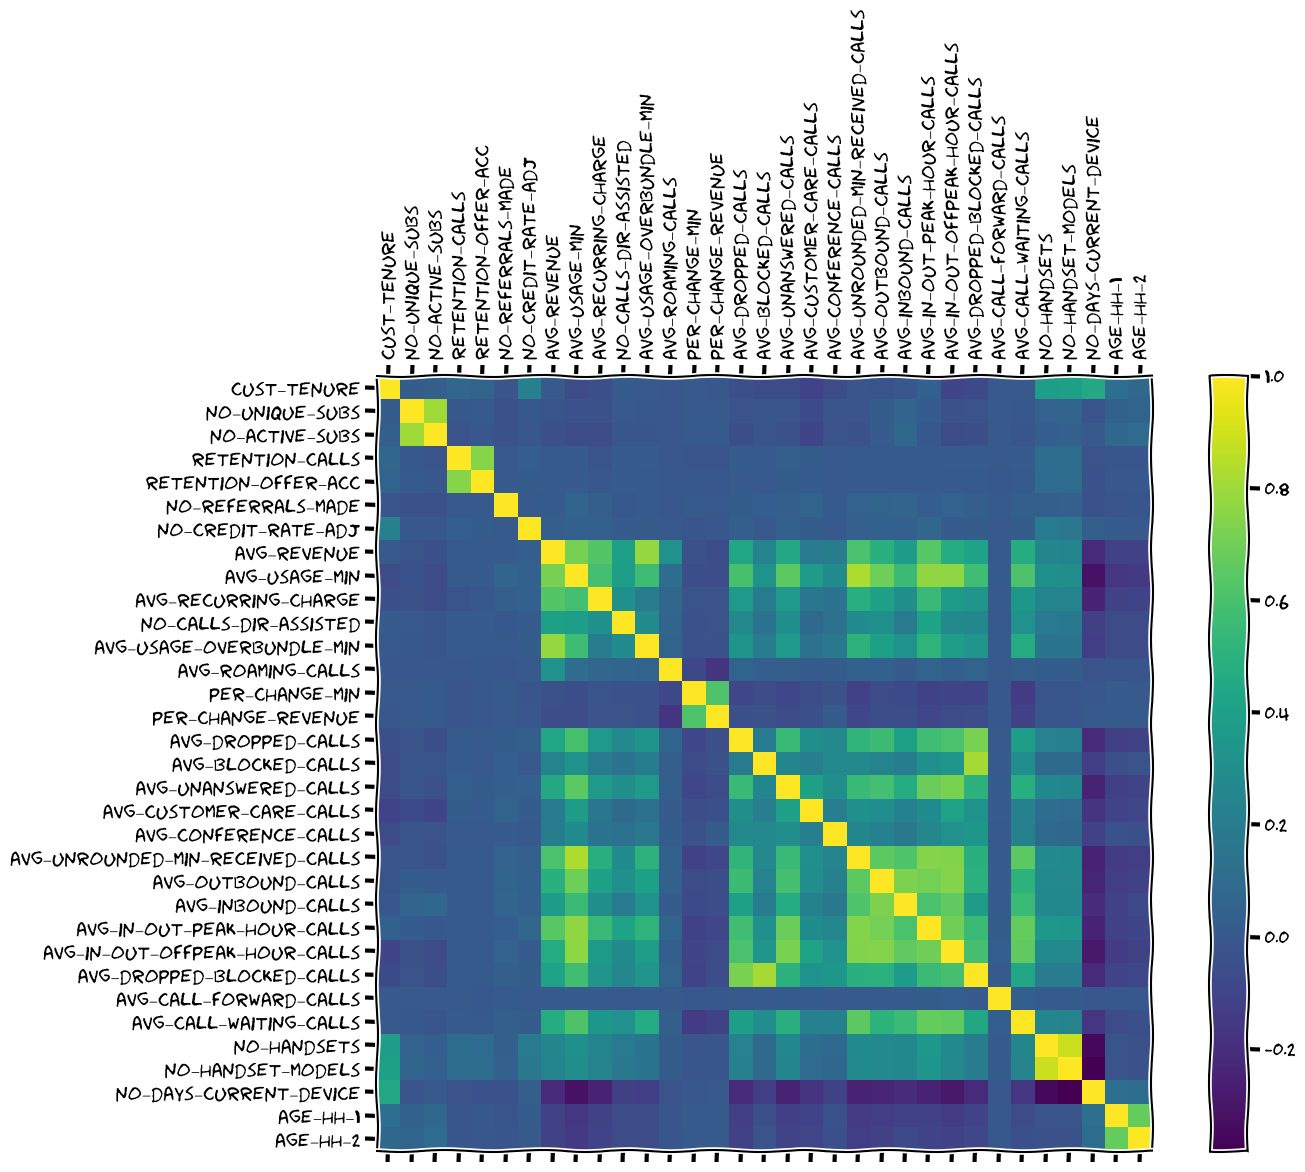

In [34]:
plt.xkcd()
f = plt.figure(figsize=(15, 10))
plt.matshow(numerical_df.corr(), fignum=f.number)
plt.xticks(range(numerical_df.shape[1]), numerical_df.columns, fontsize=14, rotation=90)
plt.yticks(range(numerical_df.shape[1]), numerical_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [35]:
"""
Pairwise correlation 
--------------------
  -> In general, 2 variables that are highly correlated lead to REDUNDANCY. An ABSOLUTE value correlation that is >= 0.8 shold be considered high

    *** In this case, all the pairs that I printed have a POSITIVE high correlation.
    *** It means that, when one increases in value, the other increases as well!

  -> Whenever you have 2 highly correlated variables, you could drop one since it is redundant
  -> Getting rid of a redundant variable might also help some ML models in working better
"""

highly_correlated_pairs = [(numerical_df.columns[i], numerical_df.columns[j], numerical_df.iloc[:, i].astype("float").corr(numerical_df.iloc[:, j].astype("float"))) 
                           for i in range(0, numerical_df.shape[1] - 1) 
                           for j in range(i + 1, numerical_df.shape[1]) 
                           if abs(numerical_df.iloc[:, i].astype("float").corr(numerical_df.iloc[:, j].astype("float"))) >= 0.8]

highly_correlated_pairs

[('no_unique_subs', 'no_active_subs', 0.8046671151650983),
 ('avg_usage_min', 'avg_unrounded_min_received_calls', 0.8280087186987678),
 ('avg_blocked_calls', 'avg_dropped_blocked_calls', 0.8151334396370088),
 ('no_handsets', 'no_handset_models', 0.8884479867900434)]

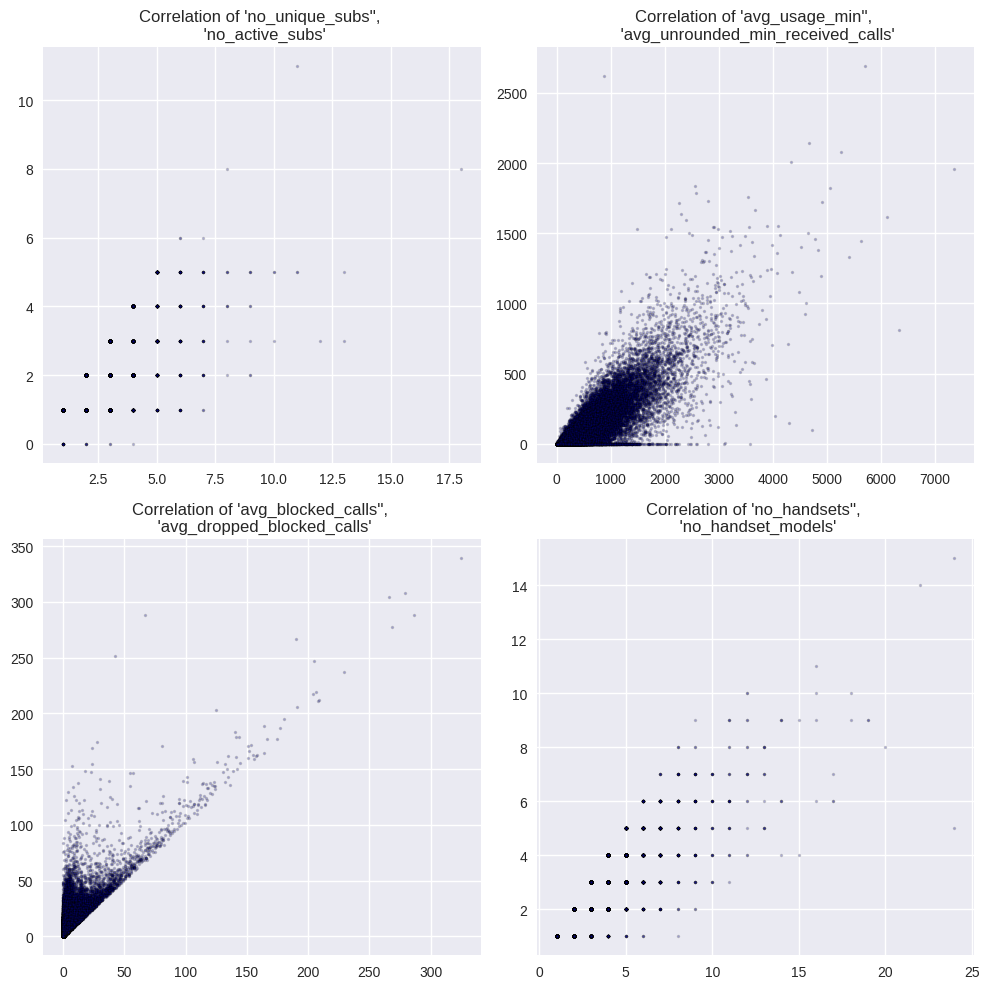

In [36]:
"""
  I also plotted the high correlated columns to give a visual intuition as well!
"""
plt.rcdefaults()
plt.style.use("seaborn")

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

nr = -1
for i in range(0, 2):
  for j in range(0, 2):
    nr += 1
    first_col = highly_correlated_pairs[nr][0]
    second_col = highly_correlated_pairs[nr][1]
    ax[i][j].scatter(numerical_df.loc[:, first_col], numerical_df.loc[:, second_col], s=2, c="blue", edgecolor="black", linewidth=1, alpha=0.2)
    ax[i][j].set_title(f"""Correlation of '{first_col}'', \n '{second_col}'""")

plt.tight_layout()
plt.show()

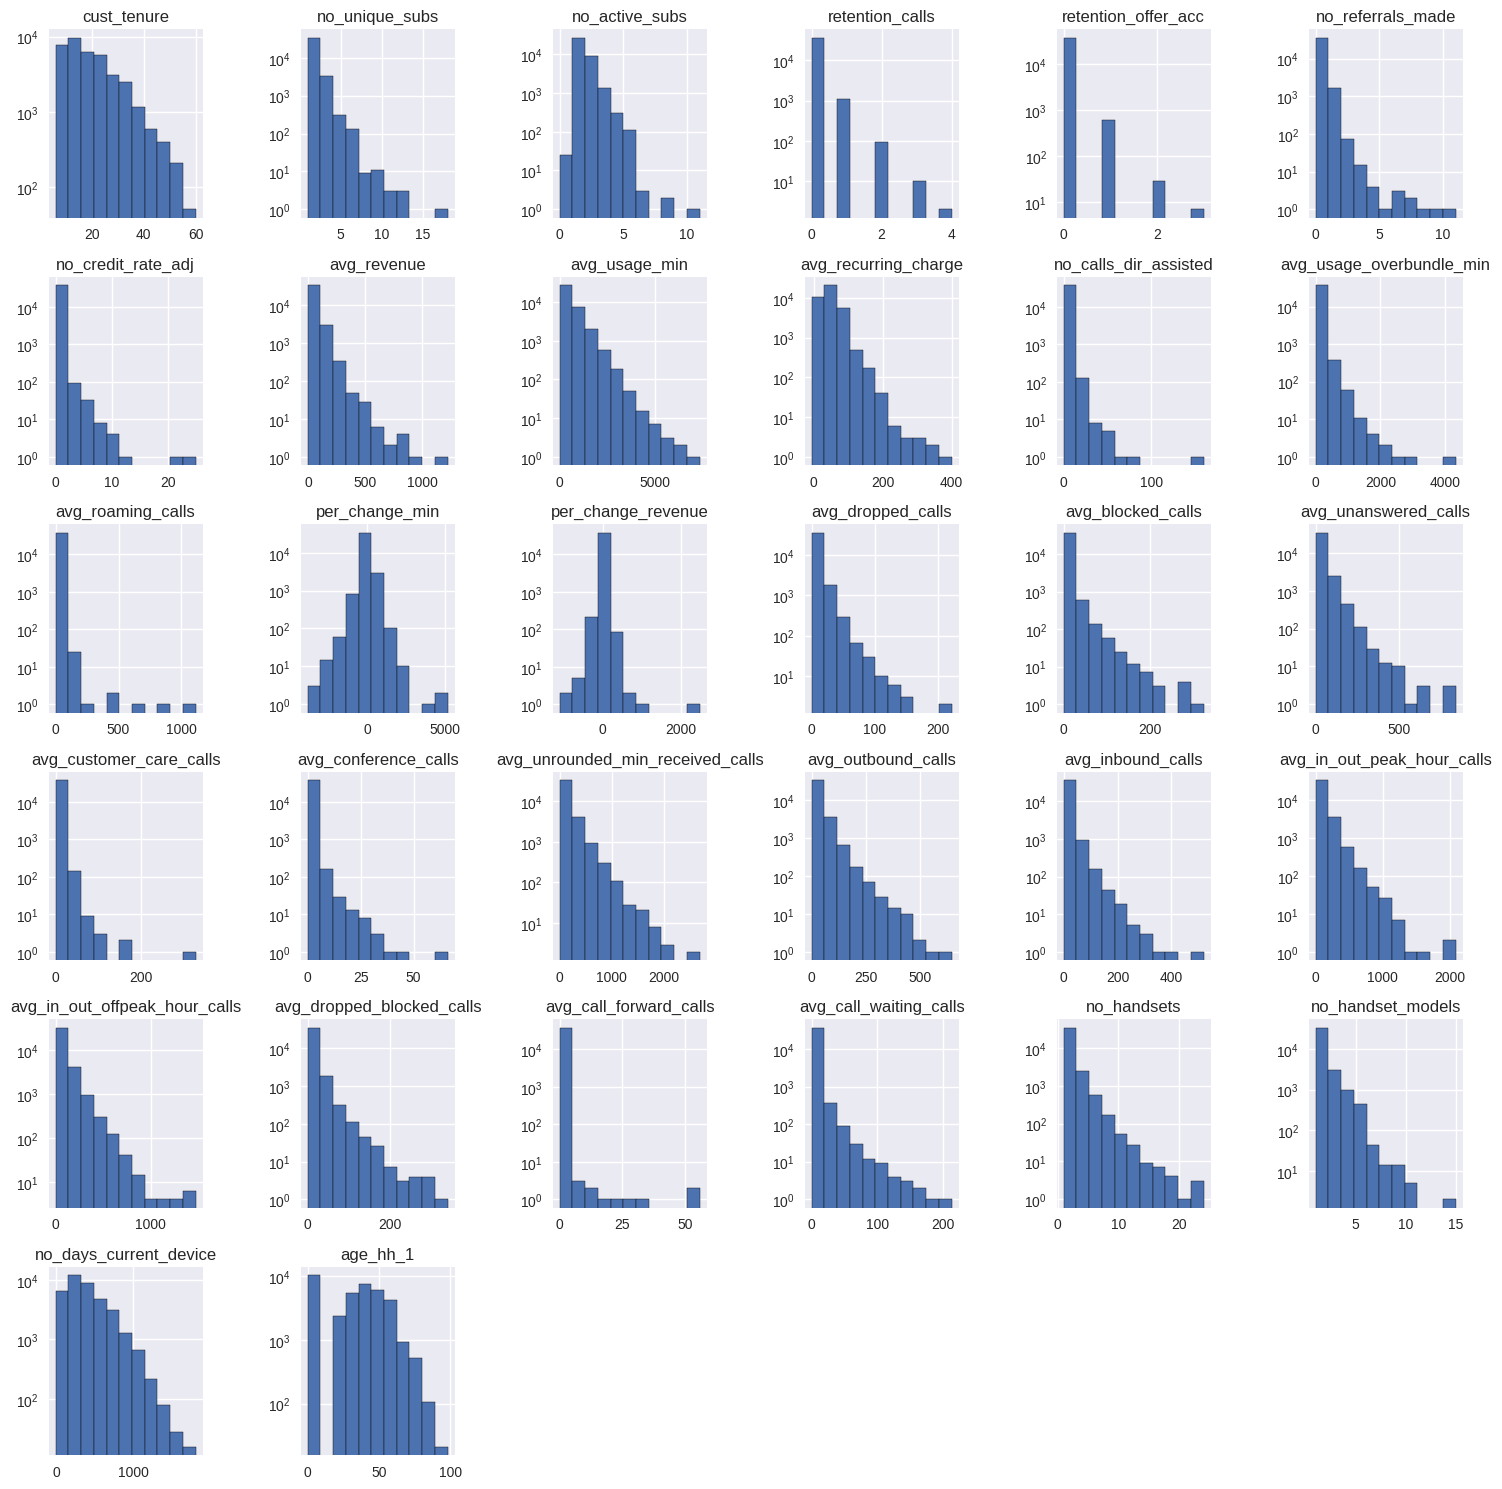

In [37]:
""" 

  Moving on, I also want to look at the DISTRIBUTIONS of my NUMERICAL COLUMNS
    -> HISTOGRAMS will help me here!

"""

plt.rcdefaults()
plt.style.use("seaborn")

fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))

nr_col = -1
for i in range(0, 6):
  for j in range(0, 6):
    nr_col += 1
    if nr_col < numerical_df.shape[1]:
      ax[i][j].hist(numerical_df.iloc[:, nr_col], bins=int(1 + np.log(len(numerical_df.iloc[:, nr_col]))), edgecolor="black", log=True)
      ax[i][j].set_title(f"""{numerical_df.columns[nr_col]}""")
    else:
      break

fig.delaxes(ax[5][2])
fig.delaxes(ax[5][3])
fig.delaxes(ax[5][4])
fig.delaxes(ax[5][5])

plt.tight_layout()
plt.show()

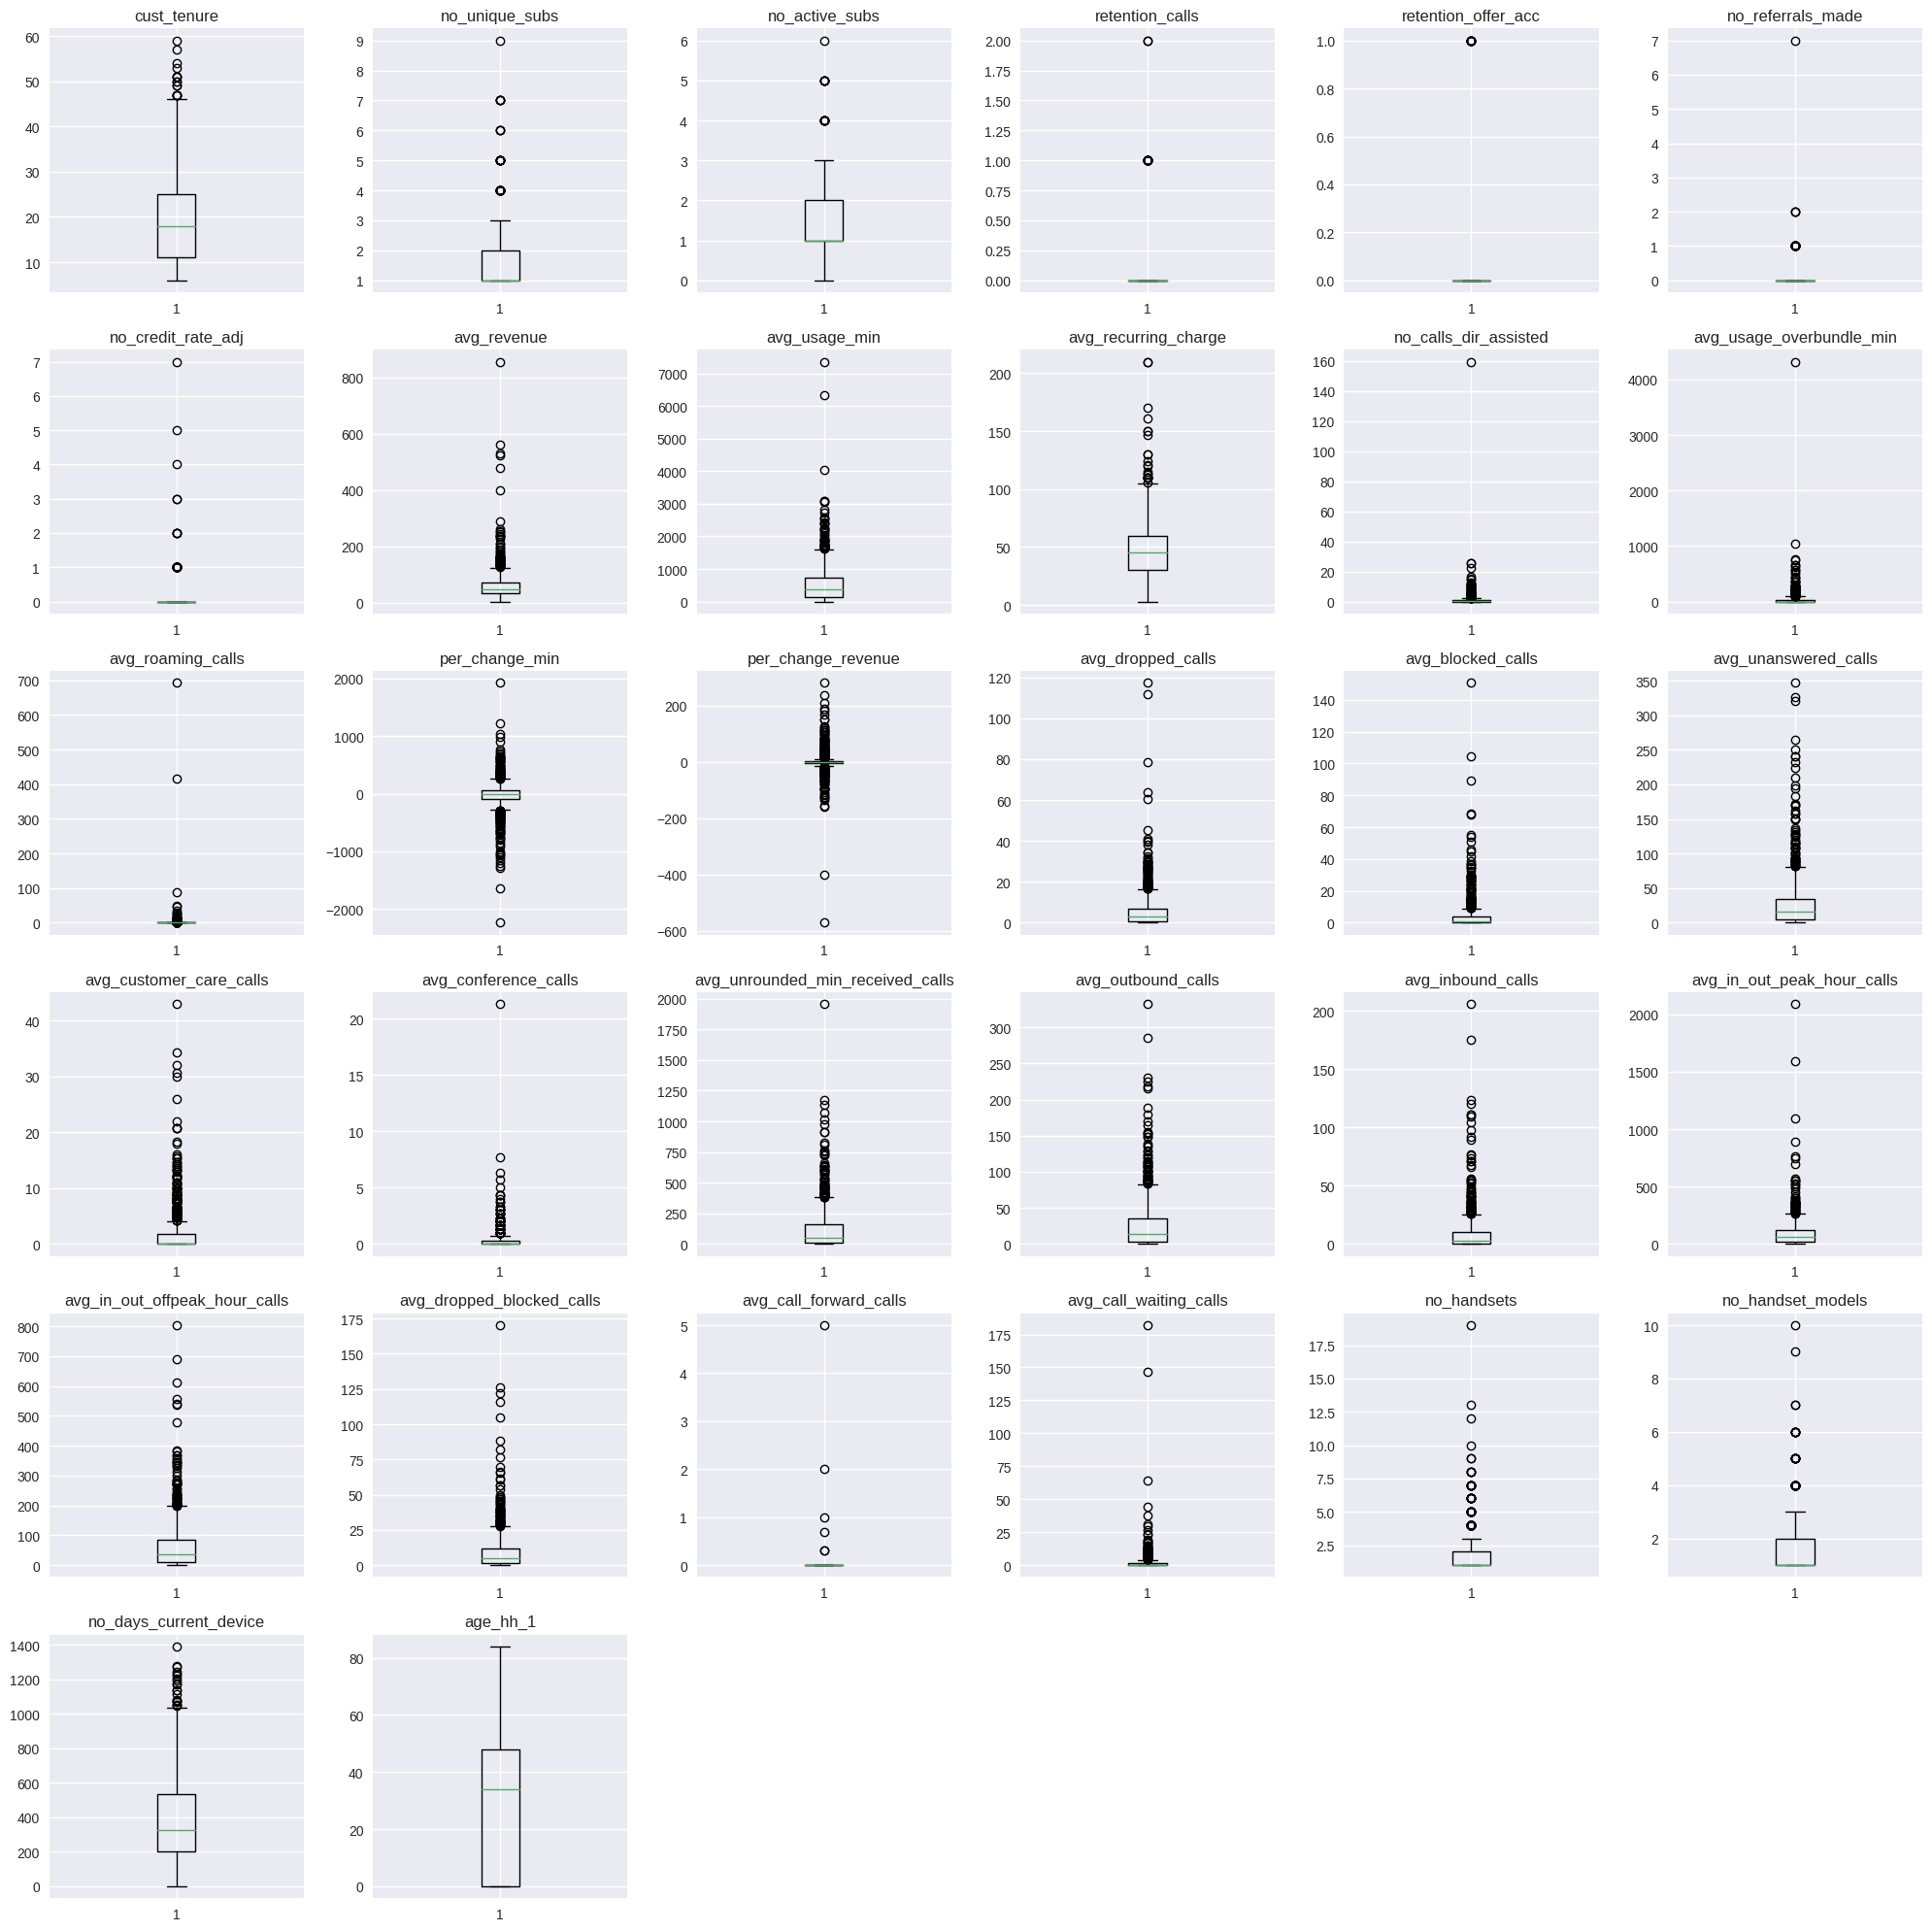

In [38]:
""" 

  Boxplots are another visual representation that help me understand the dispersion of the data!
  Not only this, but they are also quite useful in detecting POTENTIAL OUTLIERS

"""


plt.rcdefaults()
plt.style.use("seaborn")

fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))

nr_col = -1
for i in range(0, 6):
  for j in range(0, 6):
    nr_col += 1
    if nr_col < numerical_df.shape[1]:
      ax[i][j].boxplot(numerical_df.iloc[:1000, nr_col])
      ax[i][j].set_title(f"""{numerical_df.columns[nr_col]}""")
    else:
      break

fig.delaxes(ax[5][2])
fig.delaxes(ax[5][3])
fig.delaxes(ax[5][4])
fig.delaxes(ax[5][5])

plt.tight_layout()
plt.show()

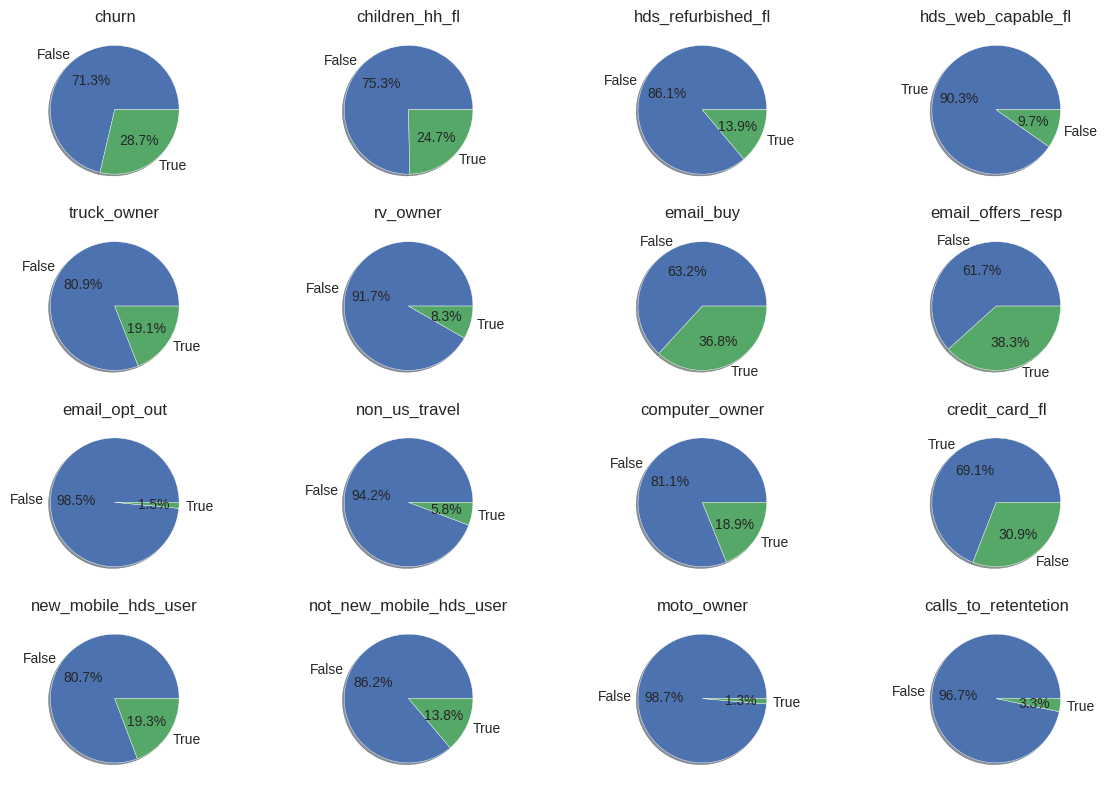

In [39]:
""" 
  In the case of BOOLEAN COLUMNS, PIECHARTS are the way to go!
"""

plt.rcdefaults()
plt.style.use("seaborn")

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 8))

nr_col = -1
for i in range(0, 4):
  for j in range(0, 4):
    nr_col += 1
    _ = boolean_df.iloc[:, nr_col].value_counts()
    labels = _.index
    counts = _.tolist()
    ax[i][j].pie(counts, labels=labels, autopct="%1.1f%%", wedgeprops={"edgecolor": "white"}, shadow=True)
    ax[i][j].set_title(f"""{boolean_df.columns[nr_col]}""")

plt.tight_layout()
plt.show()

['other', 'suburban', 'town', 'rural']
['other', 'professional', 'crafts', 'clerical', 'self', 'retired', 'student', 'homemaker']
['yes', 'unknown', 'no']
['NYCBRO917', 'DALDAL214', 'HOUHOU281', 'NYCMAN917', 'APCFCH703', 'DALFTW817', 'SANSAN210', 'APCSIL301', 'SFROAK510', 'SANAUS512', 'SFRSFR415', 'PHXPHX602', 'ATLANE678', 'NYCQUE917', 'SFRSCL408', 'ATLATL678', 'MIAMIA305', 'OHICOL614', 'CHINBK847', 'STLSTL314', 'CHICHI773', 'BOSBOS617', 'NEVLVS702', 'SANMCA210', 'MINMIN612', 'INDIND317', 'APCBAL410', 'NSHNSH615', 'LAXANA714', 'NYCNEW201', 'NYCNAS516', 'KCYKCM816', 'PHIPHI215', 'DETDET313', 'DENDEN303', 'MILMIL414', 'KCYKCK913', 'NOLKEN504', 'NEVSDG619', 'SEASEA206', 'DETPON248', 'APCWAS202', 'NYCSUF516', 'NNYBUF716', 'HARHAR860', 'NYCNEW973', 'CHILAG630', 'FLNORL407', 'NYCWHI914', 'OHICIN513', 'MIAFTL954', 'MINSTP612', 'LAXCDG310', 'HWIHON808', 'OMAOMA402', 'CHILAG708', 'LAXSAN714', 'SFRSMO650', 'MIANDA305', 'SANCRP512', 'SFROAK925', 'LOULOU502', 'NCRRIC804', 'FLNCLR813', 'BOSBOS781',

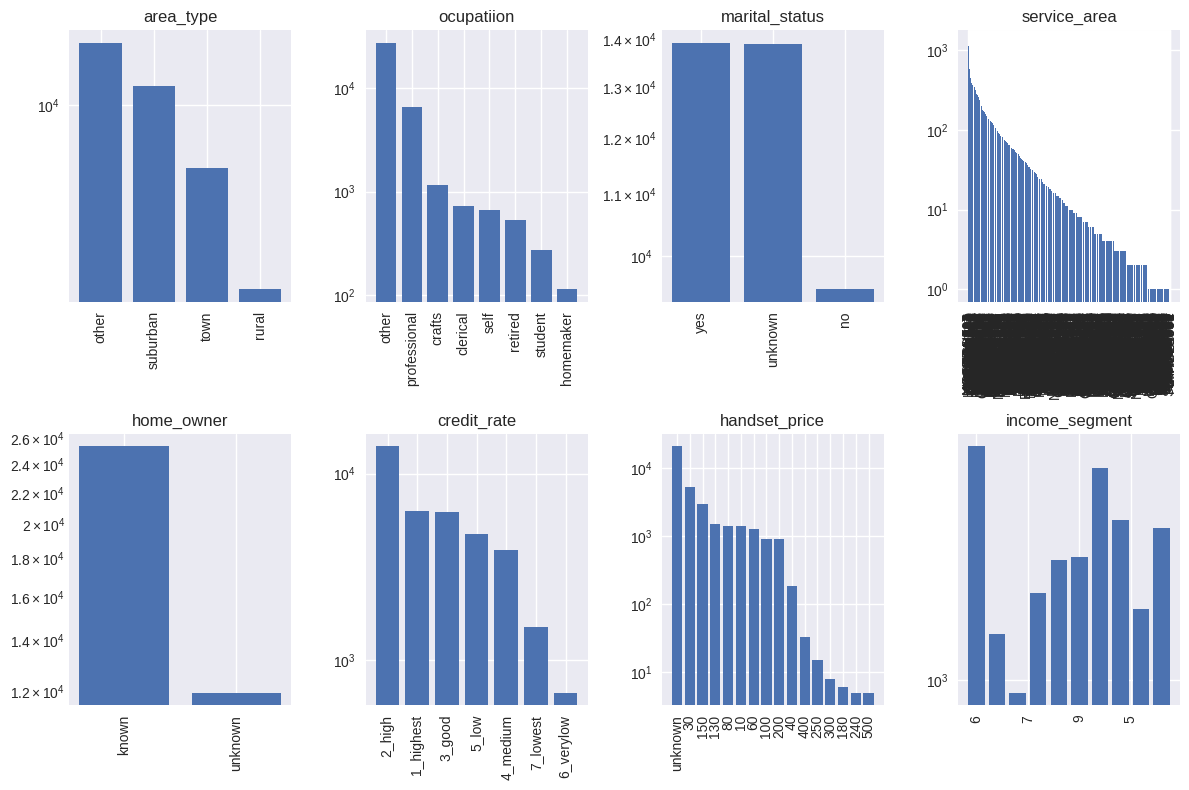

In [40]:
""" 

  The DISTRIBUTIONS of my CATEGORICAL COLUMNS are also of great interest 
    -> BARCHARTS will help me here!

  P.S.: 'service_area' barchart does not have its labels properly displayed because there are to many

"""

plt.rcdefaults()
plt.style.use("seaborn")

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

nr_col = -1
for i in range(0, 2):
  for j in range(0, 4):
    nr_col += 1
    _ = categorical_df.iloc[:, nr_col].value_counts()
    labels = _.index.tolist()
    counts = _.tolist()
    print(labels)
    ax[i][j].bar(x=labels, height=counts, log=True)
    ax[i][j].set_xticklabels(labels, rotation = 90)
    ax[i][j].set_title(f"""{categorical_df.columns[nr_col]}""")

plt.tight_layout()
plt.show()

In [41]:
""" 
  It would be of great interest to know which variables are INDEPENDENT.
  ---------------------------------------------------------------------

    -> To do this, I will try to do a CHI-SQUARED TEST OF INDEPENDENCE.
      
      *** Chi-squared test ONLY WORKS with CATEGORICAL variables
      *** There are 2 options: one-way chi-squared test and two-way chi-squared test
      *** Since I want to do the test on every pair of 2 categorical variables, the two-way variant will be chosen

    -> H_0 (the null hypothesis) = the variables are independent

    OBSERVATION: boolean columns could also be considered categorical here; a boolean column is nothing but a categorical column with 2 categories;
                 I will make an exception only here and I'll treat the boolean columns as categorical


"""
not_independent_categorical_cols = []
independent_categorical_cols = []

chi_square_columns = categorical_df.columns.tolist() + boolean_df.columns.tolist()
for i in range(0, len(chi_square_columns)):
    for j in range(i + 1, len(chi_square_columns)):

        contingency_table = pd.crosstab(customers_df.loc[:, chi_square_columns[i]], 
                                        customers_df.loc[:, chi_square_columns[j]])
        
        chi_statistic, p_value, df, expected_table = chi2_contingency(contingency_table)

        alpha = 0.05 # my significance level

        if p_value < alpha:

          print(f"""{chi_square_columns[i]} and {chi_square_columns[j]}: REJECT H_0""")
          not_independent_categorical_cols.append((chi_square_columns[i], chi_square_columns[j]))

        else:

          print(f"""{chi_square_columns[i]} and {chi_square_columns[j]}: NOT ENOUGH EVIDENCE TO REJECT H_0""")
          independent_categorical_cols.append((chi_square_columns[i], chi_square_columns[j]))
    print("-------------------------------------------------")

area_type and ocupatiion: REJECT H_0
area_type and marital_status: REJECT H_0
area_type and service_area: REJECT H_0
area_type and home_owner: REJECT H_0
area_type and credit_rate: REJECT H_0
area_type and handset_price: REJECT H_0
area_type and income_segment: REJECT H_0
area_type and churn: REJECT H_0
area_type and children_hh_fl: REJECT H_0
area_type and hds_refurbished_fl: REJECT H_0
area_type and hds_web_capable_fl: REJECT H_0
area_type and truck_owner: REJECT H_0
area_type and rv_owner: REJECT H_0
area_type and email_buy: REJECT H_0
area_type and email_offers_resp: REJECT H_0
area_type and email_opt_out: REJECT H_0
area_type and non_us_travel: REJECT H_0
area_type and computer_owner: REJECT H_0
area_type and credit_card_fl: REJECT H_0
area_type and new_mobile_hds_user: REJECT H_0
area_type and not_new_mobile_hds_user: NOT ENOUGH EVIDENCE TO REJECT H_0
area_type and moto_owner: REJECT H_0
area_type and calls_to_retentetion: REJECT H_0
----------------------------------------------

In [42]:
list(map(lambda  elem: elem[0] if elem[0] != "churn" else elem[1], filter(lambda elem: elem[0] == "churn" or elem[1] == "churn", not_independent_categorical_cols)))

['area_type',
 'marital_status',
 'service_area',
 'home_owner',
 'credit_rate',
 'handset_price',
 'income_segment',
 'children_hh_fl',
 'hds_refurbished_fl',
 'hds_web_capable_fl',
 'email_buy',
 'email_offers_resp',
 'calls_to_retentetion']

In [43]:
""" 
  t-test INFERENCE ON 2 POPULATION MEANS
  --------------------------------------

    -> This is where the boolean columns can be properly utilised

      *** For each numerical column, I will take each boolean column 
          and I'll test the equality of the means of the 2 samples.

      *** The 2 samples are obtained by the partitonining of the numerical column 
          w.r.t the unique values (True, False) of the boolean column 
    

    -> Please note that there are 3 assumptions that must be checked before doing the t-test

      *** The samples are independent simple random samples
      *** The populations are normally distributed or the sample size is big enough for CLT to apply
      *** The population variances are equal (this can be checked with an F TEST)

      OSERVATION: If all the 3 assumptions are happening then pooled variance t-test is applied
                  If the first 2 assumptions are happening, but the 3rd one is not satisfied, Welch t-test is applied

"""

# Inference on 2 population means, sigmas not known 
# Therefore, t-test

t_test_means_equal = []
t_test_means_not_equal = []

for boolean_col in boolean_df.columns:
  for numerical_col in numerical_df.columns:


      uniques = boolean_df.loc[:, boolean_col].unique()


      sample_pop_1 = customers_df.loc[customers_df.loc[:, boolean_col] == uniques[0], numerical_col]
      
      sample_pop_2 = customers_df.loc[customers_df.loc[:, boolean_col] == uniques[1], numerical_col]
      
      print("The samples are independent simple random samples ✔")

      print(f"""Sample size from first population: {len(sample_pop_1)}""") 
      print(f"""Sample size from second population: {len(sample_pop_2)}""")

      if len(sample_pop_1) < 1001 or len(sample_pop_2) < 1001:
        print("Sample size to small ✖", end="\n\n")
        continue
      else:
        print("The populations are normally distributed or sample size is big enough (CLT applies) ✔")

      var_sample_1 = float(sample_pop_1.var())
      var_sample_2 = float(sample_pop_2.var())

      if var_sample_1 < var_sample_2: # I swap them because it's easier to interpret the ratio of variances this way
          aux = var_sample_1
          var_sample_1 = var_sample_2
          var_sample_2 = var_sample_1

      F_statistic = var_sample_1 / var_sample_2
      df_sample_1 = len(sample_pop_1) - 1 # degrees of freedom for first sample
      df_sample_2 = len(sample_pop_2) - 1 # degrees of freedom for second sample

      p_value = scipy.stats.f.sf(F_statistic, df_sample_1, df_sample_2)
      alpha = 0.05 # significance level
      ok = 0
      if p_value < alpha:
          print("Population variances are not equal ✖")
          ok = 1
      else:
          print("Population variances are equal ✔")

      t_test =  ttest_ind(sample_pop_1, sample_pop_2, equal_var=(lambda elem : False if elem == 1 else True)(ok)) # pooled variance t-test or Welch t-test
      if t_test.pvalue < alpha:
          print(f"""{boolean_col}, {numerical_col}: Population means are not equal ✖""", end="\n\n")
          t_test_means_not_equal.append((boolean_col, numerical_col))
      else:
          print(f"""{boolean_col}, {numerical_col}: Population means are equal ✔""", end="\n\n")
          t_test_means_equal.append((boolean_col, numerical_col))

The samples are independent simple random samples ✔
Sample size from first population: 10700
Sample size from second population: 26619
The populations are normally distributed or sample size is big enough (CLT applies) ✔
Population variances are equal ✔
churn, cust_tenure: Population means are not equal ✖

The samples are independent simple random samples ✔
Sample size from first population: 10700
Sample size from second population: 26619
The populations are normally distributed or sample size is big enough (CLT applies) ✔
Population variances are not equal ✖
churn, no_unique_subs: Population means are not equal ✖

The samples are independent simple random samples ✔
Sample size from first population: 10700
Sample size from second population: 26619
The populations are normally distributed or sample size is big enough (CLT applies) ✔
Population variances are equal ✔
churn, no_active_subs: Population means are equal ✔

The samples are independent simple random samples ✔
Sample size from f

In [44]:
list(map(lambda elem: elem[1], filter(lambda elem: elem[0] == "churn" , t_test_means_not_equal)))

['cust_tenure',
 'no_unique_subs',
 'retention_calls',
 'retention_offer_acc',
 'no_referrals_made',
 'no_credit_rate_adj',
 'avg_usage_min',
 'avg_recurring_charge',
 'no_calls_dir_assisted',
 'avg_usage_overbundle_min',
 'per_change_min',
 'per_change_revenue',
 'avg_dropped_calls',
 'avg_unanswered_calls',
 'avg_customer_care_calls',
 'avg_conference_calls',
 'avg_unrounded_min_received_calls',
 'avg_outbound_calls',
 'avg_inbound_calls',
 'avg_in_out_peak_hour_calls',
 'avg_in_out_offpeak_hour_calls',
 'avg_dropped_blocked_calls',
 'avg_call_waiting_calls',
 'no_handsets',
 'no_handset_models',
 'no_days_current_device',
 'age_hh_1',
 'age_hh_2']

In [45]:
"""

  I will extend the previous t-test to MORE than 2 population means.
  In this case, the ANOVA-test (one-way) is handy!
  ----------------------------------------------------------------
  
    -> This is where the categorical columns can be properly utilised

      *** For each numerical column, I will take each CATEGORICAL column 
          and I'll test the equality of the means of the 3 OR MORE samples.

      *** The 3 OR MORE samples are obtained by the partitonining of the numerical column 
          w.r.t the unique values of the CATEGORICAL column 
    

    -> Please note that there are 3 assumptions that must be checked before doing the t-test

      *** The samples are independent simple random samples
      *** The populations are normally distributed or the sample size is big enough for CLT to apply
      *** The population variances are equal (this can be checked with the LEVENE TEST)

"""


for numerical_col in numerical_df.columns:
  for categorical_col in categorical_df.columns:

        print("The samples are independent simple random samples ✔")

        uniques = categorical_df.loc[:, categorical_col].unique()

        variants = []
        for value in uniques:
            variants.append(customers_df.loc[customers_df.loc[:, categorical_col] == value, numerical_col])
        
        samples_size = [len(_) for _ in variants]
        print("Sample sizes from our populations: ", [len(_) for _ in variants])
        
        ok = 0
        for sample_size in samples_size:
          if sample_size < 1001:
            print("Sample size to small ✖", end="\n\n")
            ok = 1
            break
          
        if ok == 1:
          continue

        print("The populations are normally distributed or sample size is big enough (CLT applies) ✔")

        levene_test = levene(*variants)
        if levene_test.pvalue < alpha:
            print("Population variances are not equal ✖", end="\n\n")
        else:
            print("Population variances are equal ✔")
            anova_oneway = f_oneway(*variants)
            if anova_oneway.pvalue < alpha:
                print("Population means are not equal ✖", end="\n\n")
            else:
                print(f"""{numerical_col}, {categorical_col}: Population means are equal ✔""", end="\n\n")

The samples are independent simple random samples ✔
Sample sizes from our populations:  [17865, 1829, 12002, 5623]
The populations are normally distributed or sample size is big enough (CLT applies) ✔
Population variances are not equal ✖

The samples are independent simple random samples ✔
Sample sizes from our populations:  [6483, 536, 27381, 1145, 114, 657, 728, 275]
Sample size to small ✖

The samples are independent simple random samples ✔
Sample sizes from our populations:  [9498, 13927, 13894]
The populations are normally distributed or sample size is big enough (CLT applies) ✔
Population variances are not equal ✖

The samples are independent simple random samples ✔
Sample sizes from our populations:  [876, 50, 101, 12, 198, 62, 319, 147, 57, 65, 411, 255, 38, 33, 272, 263, 73, 84, 77, 166, 371, 342, 1096, 114, 17, 342, 161, 71, 173, 448, 391, 32, 234, 475, 166, 1144, 16, 173, 234, 209, 126, 143, 49, 73, 580, 140, 360, 47, 245, 136, 56, 88, 273, 122, 373, 71, 50, 51, 97, 1243, 55

#<font color="green"> 3) Feature pre-processing  </font>

In [ ]:
"""

  Numerical Columns
  -----------------

    In general, each numerical column has an order of magnitude and a unit of meassurement. 
    For example, a person's weight could be 80 Kilograms. In this case, 80 is the order of magnitude and Kilograms is the unit of meassurement.


    It's always indicated to scale all the numerical features to a common unit of meassurement because:

      *** ML algorithms that rely on Euclidean distance need scaling in order to avoid situations where one feature weights way more in the calculation than the other one 
          (in other words, it would be harder to interpret the distance since one feature takes over everything)
      
      *** Gradient Descent based algorithms (such as Backpropagation) benefit from scaling because it's faster for the algorithm to reach the minimum of the objective function 
    

    To scale the features, there are 2 options in store:
      -> Normalisation = scaling down each feature to the interval [0, 1]
      -> Standardisation = it's a Z-score normalisation, hence each feature is mapped to a range of values such that μ=0, σ=1

    I will choose Standardisation because it's more convenient and "natural" since it keeps the distribution of the initial data.

    
    IMPORTANT NOTE:
      1) I am thinking about applying Gaussian Naive Bayes (GNB) on my numerical columns.
      2) However, GNB requires Gaussian Distributions!
      3) As you can see in the cell with the histograms (scroll up), most distributions are rather exponential
      4) To mitigate this, I will apply an Yeo-Johnson power transform operation on each feature.
      5) By doing this, I achieve standardisation, as well as mappings of my columns to Gaussian-like distributions!
 

"""

In [47]:
numerical_df_scaled = pd.DataFrame(data=PowerTransformer(method="yeo-johnson", 
                                                         standardize=True).fit_transform(numerical_df), index=numerical_df.index, columns=numerical_df.columns)

numerical_df_test_scaled = pd.DataFrame(data=PowerTransformer(method="yeo-johnson", 
                                                              standardize=True).fit_transform(numerical_df_test), index=numerical_df_test.index, columns=numerical_df_test.columns)

In [48]:
""" 

  Categorical columns:
  --------------------

    *** Here, I definitely want dummy columns for each categorical feature
    *** This is a standard practice when dealing with categorical variables
    *** However, it will also create a high dimensional space. I will have to be careful with ML models due to the CURSE OF DIMENSIONALITY

"""

' \n\n  Categorical columns:\n  --------------------\n\n    *** Here, I definitely want dummy columns for each categorical feature\n    *** This is a standard practice when dealing with categorical variables\n    *** However, it will also create a high dimensional space. I will have to be careful with ML models due to the CURSE OF DIMENSIONALITY\n\n'

In [49]:
categorical_df_dummies = pd.get_dummies(data=categorical_df, 
                                        drop_first=True)

categorical_df_test_dummies = pd.get_dummies(data=categorical_df_test,
                                             drop_first=True)

In [50]:
bool_df = copy.deepcopy(boolean_df)
for col in bool_df.columns:
  bool_df.loc[:, col] =  bool_df.loc[:, col].astype(bool)

bool_df_test = copy.deepcopy(boolean_df_test)
for col in bool_df_test.columns:
  bool_df_test.loc[:, col] =  bool_df_test.loc[:, col].astype(bool)

customers_df_scaled = pd.concat(objs=[numerical_df_scaled, categorical_df_dummies, bool_df], 
                                axis=1, 
                                join="inner")

customers_df_test_scaled = pd.concat(objs=[numerical_df_test_scaled, categorical_df_test_dummies, bool_df_test], 
                                     axis=1, 
                                     join="inner")

In [51]:
"""
  I will build a new customers DataFrame that contains my modified numerical and categorical columns and the rest of the intact columns
  
  UNBALANCED DATASET!
  ----------
    To solve this, I will apply an oversampling technique
""" 

bool_df = copy.deepcopy(boolean_df)
for col in bool_df.columns:
  bool_df.loc[:, col] =  bool_df.loc[:, col].astype(bool)

bool_df_test = copy.deepcopy(boolean_df_test)
for col in bool_df_test.columns:
  bool_df_test.loc[:, col] =  bool_df_test.loc[:, col].astype(bool)

customers_df_scaled = pd.concat(objs=[numerical_df_scaled, categorical_df_dummies, bool_df], 
                                axis=1, 
                                join="inner")

customers_df_test_scaled = pd.concat(objs=[numerical_df_test_scaled, categorical_df_test_dummies, bool_df_test], 
                                     axis=1, 
                                     join="inner")
drop_cols = []
for col in customers_df_scaled.columns:
  if col not in customers_df_test_scaled.columns:
    drop_cols.append(col)

customers_df_scaled.drop(columns=drop_cols, inplace=True)

drop_cols = []
for col in customers_df_test_scaled.columns:
  if col not in customers_df_scaled.columns:
    drop_cols.append(col)

customers_df_test_scaled.drop(columns=drop_cols, inplace=True)

X_oversampled, y_oversampled = SMOTE().fit_resample(customers_df_scaled.loc[:, customers_df_scaled.columns.difference(["churn"])], 
                                                    list(map(lambda elem: 1 if elem == True else 0, customers_df_scaled.loc[:, "churn"].tolist())))

#<font color="green"> 4) Classification </font>


  In general, when I'm thinking about ML models, I try to answer some questions:
  ------------------------------------------------------------------------------

    1) Linear or non-linear classifier?

    2) Eager or lazy classifier?

    3) Deterministic or non-deterministic algorithm?

    4) Is it parametric or non-parametric?

    5) Does it require data preparation? (normalisation/standardisation, dummies etc)

    6) Can it handle both numerical and categorical data?

    7) Can it work for classification (binary and multi-class) AND regression?

    8) Can you do statistical model validation?

    9) Is it easy to understand & visualise & interpret?

    10) Is it stable? 
  ### These questions will be taken into consideration for every model that I do + I'll also give some explanations, pros & cons and so on

# a) <font color="green"> Tree based models </font>

  The answers to my questions:
  ------------------------------------------------------------------------------

    1) A Decision Tree and a Random Forest are NON-LINEAR (non-linear models are desirable since they produce better decision surfaces)

    2) A Decision Tree and a Random Forest are EAGER classifiers (they just memorize tree-like structures and this is good)

    3) A Decision Tree and a Random Forest will be DETERMINISTIC (not really ideal since it's more like an "if"-based model)

    4) A Decision Tree and a Random Forest are NON-PARAMETRIC (they don't learn any parameters)

    5) A Decision Tree and a Random Forest require NO DATA-PREPARATION (amazing because you don't need to bother about the data)

    6) A Decision Tree and a Random Forest can handle BOTH NUMERICAL AND CATEGORICAL data (again, a big plus)

    7) A Decision Tree and a Random Forest work for BOTH CLASSIFICATION AND REGRESSION (a versatile model)

    8) A Decision Tree and a Random Forest accept STATISTICAL MODEL VALIDATION

    9) A Decision Tree and a Random Forest are very EASY TO UNDERSTAND, VISUALISE AND INTERPRET (tree structures can be plotted and the data scientist may see the decision taken at each node, hence very self explanatory)

    10) A Decision Tree is NOT STABLE (if you add new training samples, the tree structure may change quite drastically). Ensemble methods (Random Forests for example) mitigate this

In [52]:
# https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
""" 
  First, I will try to fit a Decision Tree (DT)
  ----------------------------------------


  A DT has some cons, namely:
    

    -> the DT algorithm creates biased trees if some classes dominate

        *** in my case, no need to bother about this because I did oversampling and I got same number of samples on each class label;
            however, the 'class_weight' hyperparameter of scikit's DecisionTreeClassifier is going to be set to 'balanced' just as a reminder 
            (if oversampling would have not been done, 'class_weight=balanced' solves it)


    -> the DT algorithm may create an over-complex tree that fails to generalize well, thus resulting in OVERFITTING

        *** again, I don't really have to bother about it since I apply a RandomizedSearchCV technique to find the best possible tree;
            the hyper parameters distribution is chosen in such a way that I'll never have a fully grown tree

            a) Randomized Grid Search is an automatic way of choosing the values of my ML model's hyper-parameters
            b) Each hyper-parameter I am interested in gets a distribution and for each Randomized Grid Search iteration, values of the hyper-paramters are sampled from those distributions and a model is fitted 
            c) Each model is evaluated in a Repeated Stratified K-Fold Cross Validation manner
            d) The tree that ranks the highest in terms of accuracy on the validation sets is selected
"""

# 1h 35 dureaza
DT_params = RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'), param_distributions={'max_depth':         randint(5, 100),
                                                                                                               'min_samples_split': randint(2, 40),
                                                                                                               'min_samples_leaf':  randint(1, 20)},
                               n_iter=1,
                               cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=1),
                               n_jobs=-1)

result_DT = DT_params.fit(X_oversampled, y_oversampled)

best_decision_tree = DT_params.best_estimator_

pd.DataFrame(result_DT.cv_results_).loc[[result_DT.best_index_]]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.422418      0.833827         0.384877        0.150868   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0              10                     11                      15   

                                                               params  \
0  {'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 15}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0            0.67994           0.676371           0.684636           0.671863   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0            0.66698           0.667919           0.677122           0.671675   

   split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0           0.670862           0.682134          0.67495        0.005718   

   rank_test_score  
0                1

In [53]:
def metrics_report(real_output: np.array, predicted_output: np.array) -> None:

  print("Number of mislabeled points out of a total %d points : %d" % (len(real_output), (real_output != predicted_output).sum()))

  print("The accuracy score is : %f" % (accuracy_score(y_true=real_output, y_pred=predicted_output)))

  cm = confusion_matrix(y_true=real_output, y_pred=predicted_output)

  print(cm)

  print(classification_report(y_true=real_output, y_pred=predicted_output))

  print("Balanced accuacy score: ", balanced_accuracy_score(y_true=real_output, y_pred=predicted_output))

In [99]:
print("Best DT results:")

dt_predictions = best_decision_tree.predict(customers_df_test_scaled.loc[:, customers_df_test_scaled.columns.difference(["churn"])])

metrics_report(real_output=customers_df_test_scaled.loc[:, "churn"].to_numpy(), predicted_output=dt_predictions)

Best DT results:
Number of mislabeled points out of a total 12433 points : 6272
The accuracy score is : 0.495536
[[4047 4841]
 [1431 2114]]
              precision    recall  f1-score   support

       False       0.74      0.46      0.56      8888
        True       0.30      0.60      0.40      3545

    accuracy                           0.50     12433
   macro avg       0.52      0.53      0.48     12433
weighted avg       0.61      0.50      0.52     12433

Balanced accuacy score:  0.5258329482454592


In [ ]:
""" 
  The previous Decision Tree (DT) uses all the features of my training set


  This can be a problem because:
    -> It might take a long time to build the tree since lots of information gain scores are calculated
    -> It could split on features that are not very relevant


  Therefore, I would like to do some automatic feature selection

  There are 3 options when it comes to feature selection:

    1) Filter methods 

       -> Here, univariate statistical measures are used (example: please see the tree that I have drawn in the picture on the next cell)

    2) Wrapper methods
       
       -> Wrapper feature selection creates the same model multiple times with different subsets of input features and selects those features that result in the best performing model according to a performance metric

    3) Embedded methods

      -> In embedded techniques, the feature selection algorithm is integrated as part of the learning algorithm (example: feature importances in a Decision Tree)
    
  I will use the feature importances of my previously fitted decision tree to select a subset of good features with Recursive Feature Elimination + Cross Validation and then I will fit a Random Forest on that subset
"""

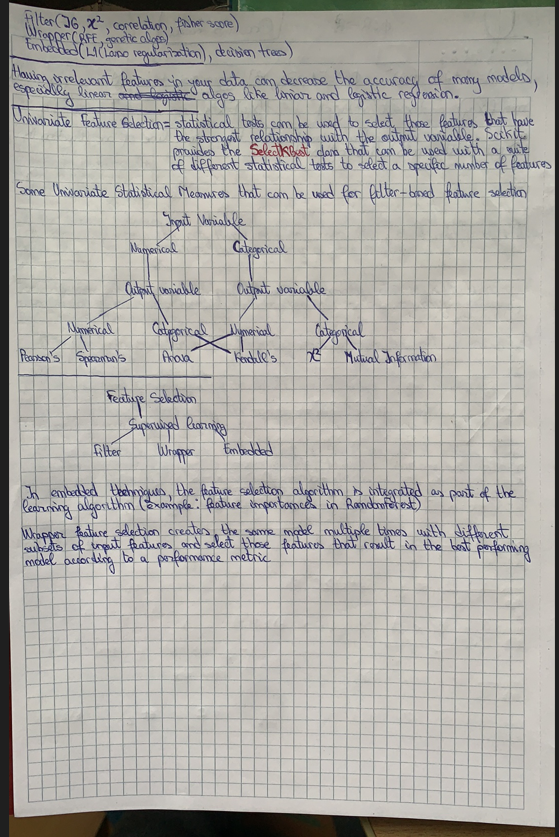

In [56]:
Image(filename=r"/content/drive/MyDrive/Customers/feature_selection.PNG", width= 700, height=800)

In [57]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/

selector = RFECV(estimator=best_decision_tree, 
                 step=1, 
                 min_features_to_select=808, 
                 cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=1), 
                 scoring="accuracy", 
                 n_jobs=-1).fit(X_oversampled, y_oversampled)

print(selector.cv_results_)

X_random_forest = copy.deepcopy(X_oversampled.loc[:, selector.support_])
Y_random_forest = copy.deepcopy(y_oversampled)

{'mean_test_score': array([0.67793667]), 'std_test_score': array([0.00534471]), 'split0_test_score': array([0.66829452]), 'split1_test_score': array([0.68219384]), 'split2_test_score': array([0.67505635]), 'split3_test_score': array([0.67993989]), 'split4_test_score': array([0.67843727]), 'split5_test_score': array([0.67824944]), 'split6_test_score': array([0.68332081]), 'split7_test_score': array([0.68557476]), 'split8_test_score': array([0.67894045]), 'split9_test_score': array([0.66935938])}


In [58]:
#max_features=sqrt recommended for classification
RF_params = RandomizedSearchCV(estimator=RandomForestClassifier(max_features='sqrt', 
                                                                class_weight='balanced', 
                                                                bootstrap=True, 
                                                                n_jobs=-1),
                               
                               param_distributions={'n_estimators': randint(100, 500), 
                                                    'min_samples_split': randint(2, 40), 
                                                    'min_samples_leaf':  randint(1, 20)},
                               
                               n_iter=1, 
                               n_jobs=-1, 
                               cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=1))
         
result_RF = RF_params.fit(X_random_forest, Y_random_forest)

best_rf_estimator = RF_params.best_estimator_

pd.DataFrame(result_RF.cv_results_).loc[[result_RF.best_index_]]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     111.768536      0.800609         1.324424        0.254337   

  param_min_samples_leaf param_min_samples_split param_n_estimators  \
0                      8                      30                413   

                                                                  params  \
0  {'min_samples_leaf': 8, 'min_samples_split': 30, 'n_estimators': 413}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.759579           0.773479           0.763899           0.766153   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0           0.759391            0.75695           0.767468           0.765778   

   split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0           0.767049           0.758971         0.763872        0.004843   

   rank_test_score  
0                1

In [98]:
print("Best RF results:")

rf_predictions = best_rf_estimator.predict(customers_df_test_scaled.loc[:, X_random_forest.columns])

metrics_report(real_output=customers_df_test_scaled.loc[:, "churn"].to_numpy(), predicted_output=rf_predictions)

Best RF results:
Number of mislabeled points out of a total 12433 points : 5088
The accuracy score is : 0.590767
[[5245 3643]
 [1445 2100]]
              precision    recall  f1-score   support

       False       0.78      0.59      0.67      8888
        True       0.37      0.59      0.45      3545

    accuracy                           0.59     12433
   macro avg       0.57      0.59      0.56     12433
weighted avg       0.66      0.59      0.61     12433

Balanced accuacy score:  0.5912525755396414


# b) <font color="green"> Naive Bayes variants </font>

  The answers to my questions:
  ------------------------------------------------------------------------------

    1) Naive Bayes methods are LINEAR (not ideal, but still fine)

    2) Naive Bayes methods are EAGER classifiers (there are only estimated probabilities to be learned)

    3) Naive Bayes methods are NON-DETERMINISTIC (this is very good since a probabilistic behavior is involved)

    4) Naive Bayes methods are PARAMETRIC (the algorithm has to estimate/learn probabilities)

    5) Naive Bayes methods require SOME DATA-PREPARATION (for example, in the case of Gaussian Naive Bayes some gaussian mappings might be necessary)

    6) Naive Bayes methods can handle BOTH NUMERICAL AND CATEGORICAL data (a big plus)

    7) Naive Bayes methods work ONLY FOR CLASSIFICATION (it would have been nice to have a version for regression too, but it's still fine)

    8) Naive Bayes methods accept STATISTICAL MODEL VALIDATION

    9) Naive Bayes methods are very EASY TO UNDERSTAND, but HARDER TO VISUALISE AND INTERPRET (you can't visualise the model and the interpretaion is quite limited)

    10) Naive Bayes methods are RELATIVELY STABLE (if you add only a few new training samples, the probabilities will not change drastically)

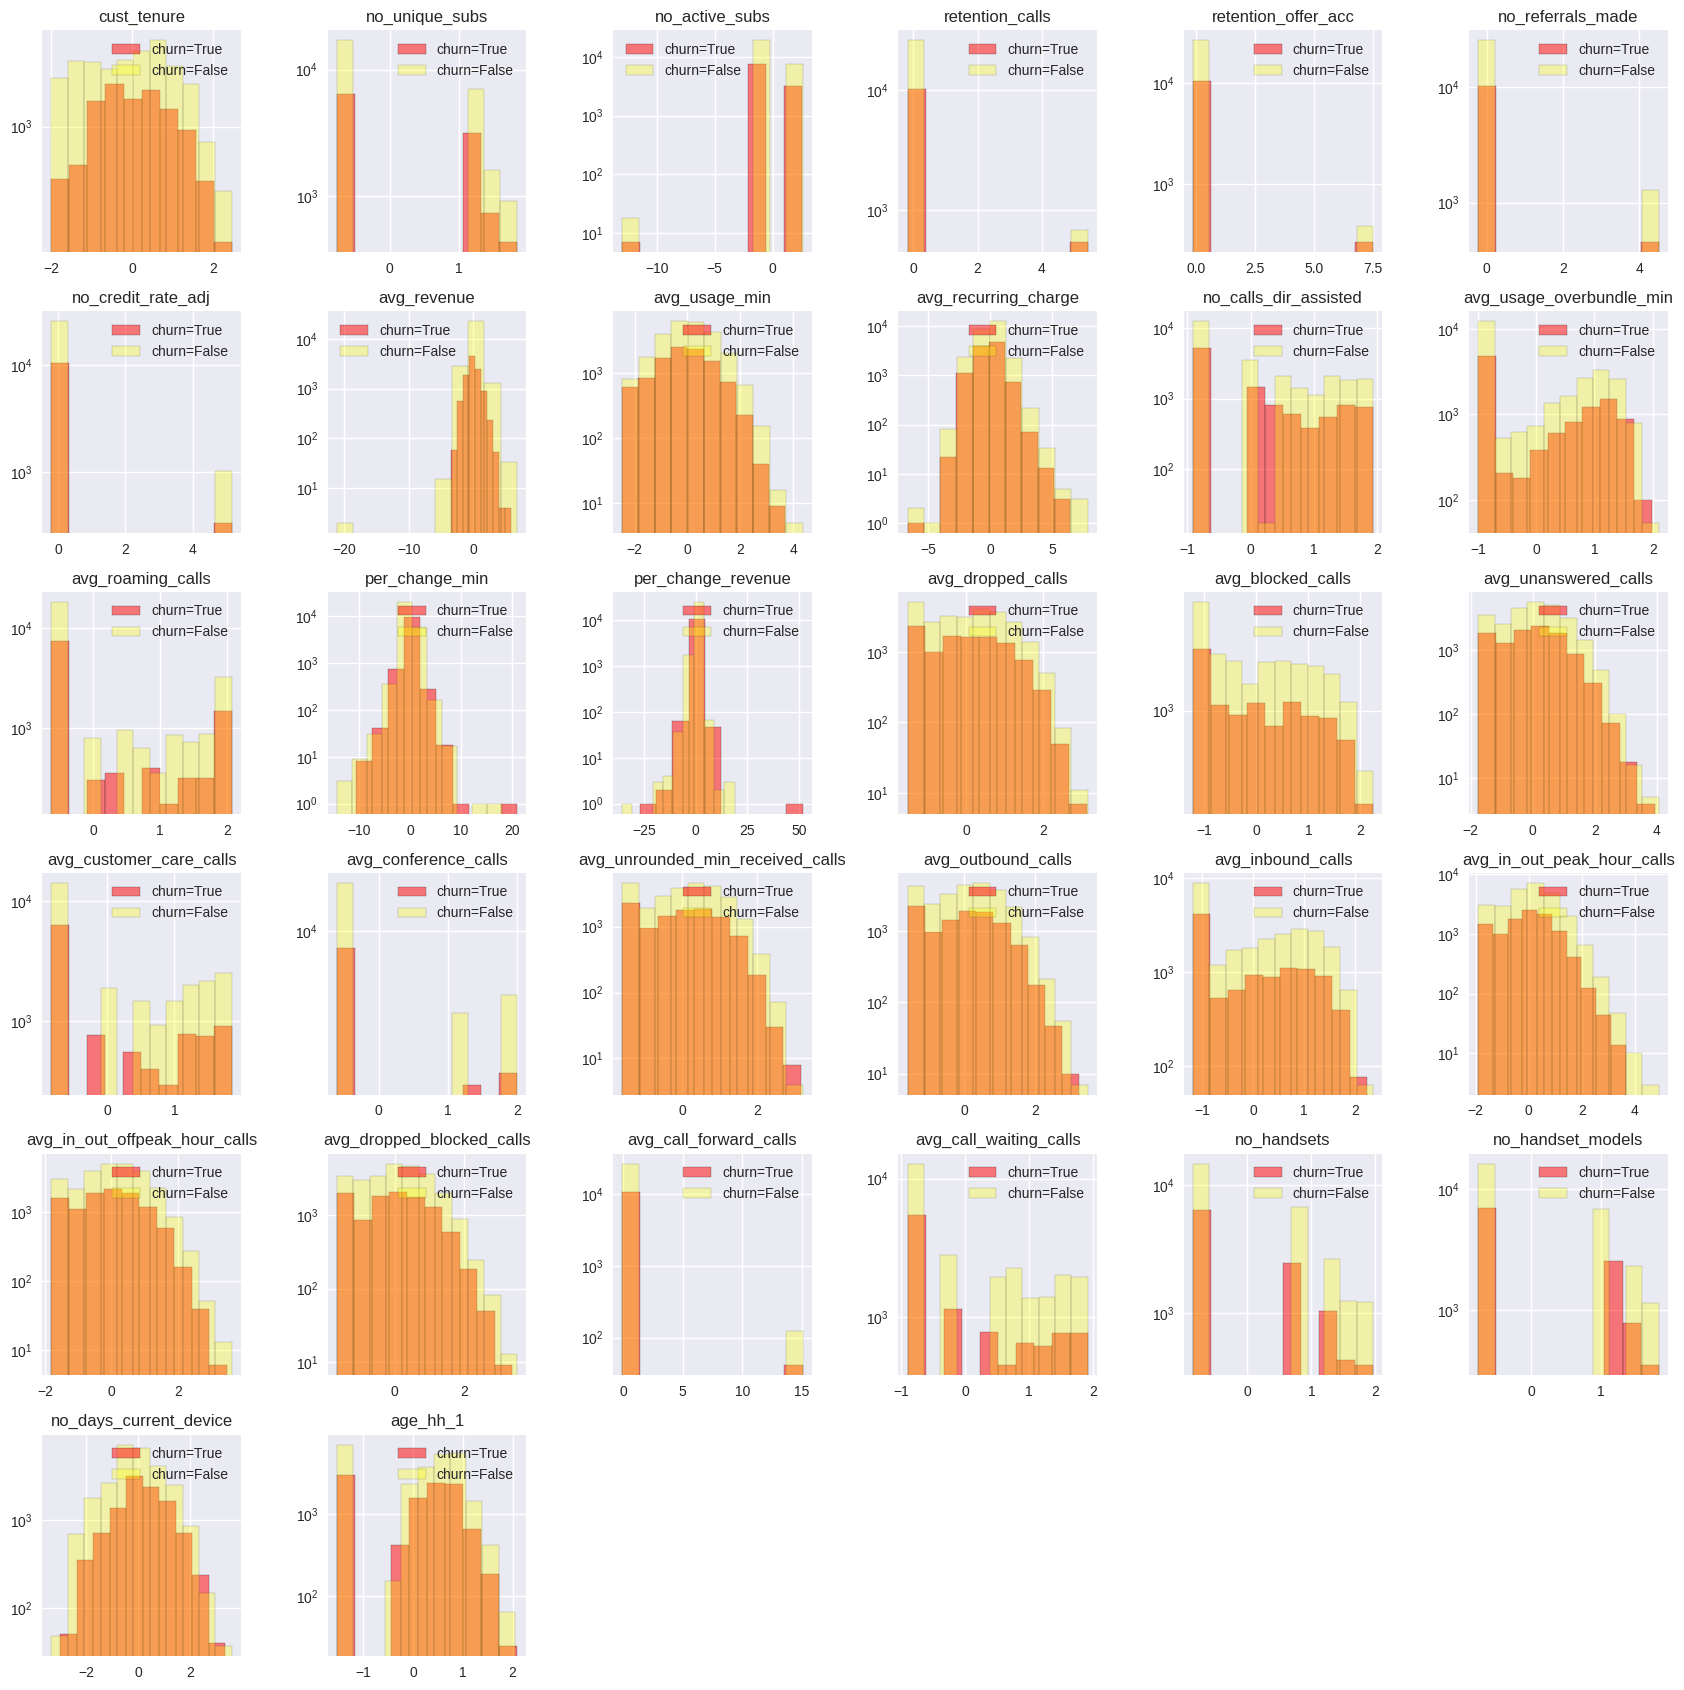

In [60]:
"""

  I want to check the distributions of my numerical columns after the power transformation.

  I will plot the Histograms, conditioned by the output column "churn"

  The results are not really the best, but I managed to get 2 things:
    1) Standardised features
    2) Some features seem to closely resemble the Gaussian distribution, hence I can use them for GNB

"""

plt.rcdefaults()
plt.style.use("seaborn")

fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(17, 17))

nr_col = -1
for i in range(0, 6):
  for j in range(0, 6):
    nr_col += 1
    if nr_col < numerical_df_scaled.shape[1]:

      ax[i][j].hist(numerical_df_scaled.iloc[customers_df.loc[:, "churn"].to_numpy() == True, nr_col], 
                    bins=int(1 + np.log(len(numerical_df_scaled.iloc[customers_df.loc[:, "churn"].to_numpy() == True, nr_col]))), 
                    edgecolor="black",
                    alpha=0.5, 
                    color="red",
                    log=True,
                    label="churn=True")
      
      ax[i][j].hist(numerical_df_scaled.iloc[customers_df.loc[:, "churn"].to_numpy() == False, nr_col], 
                    bins=int(1 + np.log(len(numerical_df_scaled.iloc[customers_df.loc[:, "churn"].to_numpy() == False, nr_col]))), 
                    edgecolor="black", 
                    alpha=0.3,
                    color="yellow",
                    log=True,
                    label="churn=False")
      
      ax[i][j].legend(loc='best')

      ax[i][j].set_title(f"""{numerical_df_scaled.columns[nr_col]}""")
    else:
      break

fig.delaxes(ax[5][2])
fig.delaxes(ax[5][3])
fig.delaxes(ax[5][4])
fig.delaxes(ax[5][5])

plt.tight_layout()
plt.show()

In [61]:
""" 

  1) Apart from using only the numerical columns that seem to closely resemble the Gaussian distribution,
  2) I can also take into consideration the results of my previous t-tests! (t-tests have been done during the exploratory data analysis phase) 
    ----
    How?
    ----
      a) I will look at the 't_test_means_not_equal' list
      b) I will select all the 2 column pairs where one column is "churn" and the other is a numerical one
      c) Since the mean(μ) of a numerical column when churn=False|0 is not equal to the mean(μ) of that same numerical column when churn=True|1, 
        it means that: the values of the numerical column can be "explained" by the output column 'churn'

  3) I also got a list of highly correlated numerical columns. 
     I will be careful not to include 2 highly correlated columns in the GNB since that could violate the independece supposition of the model  

  To sum it up, for GNB, I will use all the affirmations made at 1), 2) and 3)

"""


numerical_cols_explained_by_output = set(map(lambda elem: elem[1], 
                                             filter(lambda elem: elem[0] == "churn" , t_test_means_not_equal)))

print(f"""The numerical columns that can be *explained* by the 'churn' column: {numerical_cols_explained_by_output}""", end="\n\n")


numerical_cols_gaussian_distributions = {"cust_tenure", "avg_revenue", "avg_usage_min", "avg_recurring_charge", "per_change_min", "per_change_revenue", "no_days_current_device"}

print(f"""The numerical columns that seem to closely resemble Gaussian distributions: {numerical_cols_gaussian_distributions}""", end="\n\n")

print(f"""Highly correlated columns: {highly_correlated_pairs}""", end="\n\n\n")

gaussian_NB_columns = numerical_cols_explained_by_output.intersection(numerical_cols_gaussian_distributions)

for pair in highly_correlated_pairs:
  if pair[0] in gaussian_NB_columns and pair[1] in gaussian_NB_columns:
    gaussian_NB_columns.remove(pair[0])
    print(f""" I dropped {pair[0]}""")


print(f"""The intersection of the 3 affirmations is: {gaussian_NB_columns}""", end="\n\n")

The numerical columns that can be *explained* by the 'churn' column: {'no_credit_rate_adj', 'no_referrals_made', 'avg_in_out_peak_hour_calls', 'avg_dropped_calls', 'no_days_current_device', 'age_hh_2', 'avg_usage_overbundle_min', 'avg_conference_calls', 'avg_unrounded_min_received_calls', 'no_handsets', 'age_hh_1', 'no_handset_models', 'avg_dropped_blocked_calls', 'avg_customer_care_calls', 'avg_in_out_offpeak_hour_calls', 'avg_recurring_charge', 'avg_inbound_calls', 'avg_outbound_calls', 'per_change_min', 'retention_offer_acc', 'no_unique_subs', 'retention_calls', 'avg_usage_min', 'no_calls_dir_assisted', 'cust_tenure', 'per_change_revenue', 'avg_call_waiting_calls', 'avg_unanswered_calls'}

The numerical columns that seem to closely resemble Gaussian distributions: {'avg_usage_min', 'avg_recurring_charge', 'cust_tenure', 'per_change_min', 'no_days_current_device', 'avg_revenue', 'per_change_revenue'}

Highly correlated columns: [('no_unique_subs', 'no_active_subs', 0.8046671151650983

In [62]:
X_gaussian_NB = copy.deepcopy(X_oversampled.loc[:, gaussian_NB_columns])
Y_gaussian_NB = copy.deepcopy(y_oversampled)

gaussian_NB = GaussianNB()

scores_gaussian_nb = cross_validate(estimator=gaussian_NB, 
                                    X=X_gaussian_NB, 
                                    y=Y_gaussian_NB, 
                                    scoring=["recall", "precision", "accuracy"], 
                                    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=5), 
                                    return_train_score=True,
                                    return_estimator=True)


best_gaussian_NB = scores_gaussian_nb['estimator'][np.argmax(scores_gaussian_nb['test_accuracy'])]

scores_gaussian_nb["test_accuracy"]

array([0.5890308 , 0.57494365, 0.58339594, 0.58095417, 0.58226897,
       0.57832457, 0.57344102, 0.5837716 , 0.59233515, 0.58219049,
       0.5890308 , 0.58020285, 0.58527423, 0.58827949, 0.58677686,
       0.587716  , 0.57757325, 0.5785124 , 0.5795604 , 0.56772497,
       0.57625845, 0.58677686, 0.58208114, 0.58583772, 0.5837716 ,
       0.58433509, 0.57550714, 0.58208114, 0.58275409, 0.57805749,
       0.59485349, 0.57757325, 0.58940646, 0.57588279, 0.57400451,
       0.58020285, 0.57513148, 0.58959429, 0.57899681, 0.58482059,
       0.57644628, 0.57550714, 0.57531931, 0.59297521, 0.58564989,
       0.58226897, 0.57945154, 0.58884298, 0.58125117, 0.58538418])

In [63]:
""" 

  Given that I have lots of dummy columns, as well as boolean columns, I want to try a Categorical Naive Bayes model too!
  ----------------------------------------------------------------------------------------------------------------------

  
  Once again, I want to use some of the findings of my exploratory data analysis.

  This time, I will focus on the results of my Chi-Square test of independence!
    How?
    ----
      a) I will look at the 'not_independent_categorical_cols' list

      b) I will select all the 2 column pairs where one column is 'churn' and the other is a dummy or boolean one

      c) If 'churn' is not independent from the other dummy|boolean column,
         it means that: 'churn' can be explained by the other column or vice-versa!

      d) Therefore, I will use all the dummy|boolean columns that can "explain" the output
       

"""

categorical_cols_dependent_on_output_col = list(map(lambda  elem: elem[0] if elem[0] != "churn" else elem[1], 
                                                filter(lambda elem: elem[0] == "churn" or elem[1] == "churn", 
                                                        not_independent_categorical_cols)
                                                   )
                                               )

_ = "|".join(["([^a-zA-Z0-9]" + elem + ")" 
              for elem in categorical_cols_dependent_on_output_col])

columns_for_categorical_nb = X_oversampled.columns.str.contains(pat=_, regex=True)
 

X_bernoulli_NB = copy.deepcopy(X_oversampled.loc[:, columns_for_categorical_nb])
Y_bernoulli_NB = copy.deepcopy(y_oversampled)

bernoulli_NB = BernoulliNB(alpha=1)
scores_bernoulli_nb = cross_validate(estimator=bernoulli_NB, 
                                     X=X_bernoulli_NB, 
                                     y=Y_bernoulli_NB, 
                                     scoring=["recall", "precision", "accuracy"], 
                                     cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=5),
                                     return_train_score=True, 
                                     return_estimator=True,
                                     error_score='raise')

best_bernoulli_NB = scores_bernoulli_nb['estimator'][np.argmax(scores_bernoulli_nb['test_accuracy'])]

scores_bernoulli_nb["test_accuracy"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


array([0.50187829, 0.51089406, 0.49981217, 0.50507137, 0.50206612,
       0.50093914, 0.506574  , 0.49830954, 0.50610558, 0.50460267,
       0.50544703, 0.50563486, 0.50619835, 0.5       , 0.50432006,
       0.50469572, 0.50244177, 0.50206612, 0.4997182 , 0.50572985,
       0.50281743, 0.50488355, 0.50319309, 0.5052592 , 0.50507137,
       0.50432006, 0.50338092, 0.49812171, 0.50685704, 0.5023483 ,
       0.5026296 , 0.50169046, 0.50469572, 0.50488355, 0.50319309,
       0.50413223, 0.50713749, 0.50093914, 0.50385121, 0.50309976,
       0.5013148 , 0.50469572, 0.50281743, 0.50056349, 0.50544703,
       0.50206612, 0.50676183, 0.50375657, 0.50422694, 0.50460267])

In [64]:
""" 

  The results of both Gaussian and Bernoulli Naive Bayes are quite bad :(

  My first intuition is that I did not pick the best columns for the models.
  Choosing them by hand was not ideal, therefore I should try to automate the process! 

  As a solution, I'm using 'SelectKBest' 
    -> to always choose the most significant k NUMERICAL columns and then fit the model with those columns (in the case of GNB)
    -> to always choose the most significant k CATEGORICAL/BOOLEAN columns and then fit the model with those columns (in the case of Bernoulli Naive Bayes)
"""



X_gaussian_NB = copy.deepcopy(X_oversampled.loc[:, X_oversampled.dtypes.loc[X_oversampled.dtypes == "float64"].index])
Y_gaussian_NB = copy.deepcopy(y_oversampled)

maxi = 0

for k_best in range(2, X_oversampled.dtypes.value_counts().loc[X_oversampled.dtypes.value_counts().index == "float64"].iloc[0] + 1):


  select_k_best = SelectKBest(score_func=f_classif, 
                              k=k_best).fit(X_gaussian_NB, Y_gaussian_NB)

  # print(select_k_best.scores_) F-value for each column; 
  #                              BIG F-value => SMALL p-value => REJECT H_0 (a.k.a means are not equal) => the split of the values of a feature according to the label is signif
  X_best_features = select_k_best.transform(X_gaussian_NB) # Only the best k features were selected according to the descending ordder of their corresponding F-values 


  gaussian_NB = GaussianNB()
  scores_gaussian_nb = cross_validate(estimator=gaussian_NB, 
                                      X=X_best_features, 
                                      y=Y_gaussian_NB, 
                                      scoring=["recall", "precision", "accuracy"], 
                                      cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=5), 
                                      return_train_score=True,
                                      return_estimator=True)

  if scores_gaussian_nb["test_accuracy"].mean() > maxi:

    maxi = scores_gaussian_nb["test_accuracy"].mean()

    memorize_X_best_features_gaussian_nb = copy.deepcopy(X_oversampled.loc[:, select_k_best.get_feature_names_out()])

    best_gaussian_NB = scores_gaussian_nb['estimator'][np.argmax(scores_gaussian_nb['test_accuracy'])]

  print(scores_gaussian_nb["test_accuracy"].mean())

0.5588641010835278
0.5564182841765312
0.5607911155719203
0.5597880432688447
0.5569780087631281
0.5524925831834491
0.5514407354049372
0.5488410605747736
0.5491152968286273
0.5590405097423214
0.5567188284457409
0.5559489008545342
0.5556594943367689
0.5583343055870975
0.5592547050330752
0.556027630120511
0.554735287504589
0.554663917538578
0.5548517998739011
0.5548368109813063
0.5539050684179184
0.5540440538931106
0.5540402592099578
0.5538074010224261
0.5519929835412235
0.5524212259204876
0.552594093251392
0.5526466556470065
0.5523611807230379
0.5524475508732428
0.5523798958434634
0.5535519292897457


In [97]:
print("Best GNB results:")

gaussian_nb_predictions = best_gaussian_NB.predict(customers_df_test_scaled.loc[:, memorize_X_best_features_gaussian_nb.columns].to_numpy())

metrics_report(real_output=customers_df_test_scaled.loc[:, "churn"].to_numpy(), predicted_output=gaussian_nb_predictions)

Best GNB results:
Number of mislabeled points out of a total 12433 points : 5866
The accuracy score is : 0.528191
[[4383 4505]
 [1361 2184]]
              precision    recall  f1-score   support

       False       0.76      0.49      0.60      8888
        True       0.33      0.62      0.43      3545

    accuracy                           0.53     12433
   macro avg       0.54      0.55      0.51     12433
weighted avg       0.64      0.53      0.55     12433

Balanced accuacy score:  0.5546078990832792


In [66]:
X_bernoulli_NB = X_oversampled.loc[:, X_oversampled.dtypes.loc[(X_oversampled.dtypes == "uint8") | 
                                                               (X_oversampled.dtypes == "bool")].index.difference(["churn"])]

Y_bernoulli_NB = copy.deepcopy(y_oversampled)

maxi = 0

for k_best in range(2, 100):

  select_k_best = SelectKBest(score_func=chi2, 
                              k=k_best).fit(X_bernoulli_NB, Y_bernoulli_NB)

  X_best_features = select_k_best.transform(X_bernoulli_NB)


  bernoulli_NB = BernoulliNB(alpha=1)

  scores_bernoulli_nb = cross_validate(estimator=bernoulli_NB, 
                                      X=X_best_features, 
                                      y=Y_bernoulli_NB, 
                                      scoring=["recall", "precision", "accuracy"], 
                                      cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=5),
                                      return_train_score=True, 
                                      return_estimator=True,
                                      error_score='raise')

  if scores_bernoulli_nb["test_accuracy"].mean() > maxi:

    maxi = scores_bernoulli_nb["test_accuracy"].mean()

    memorize_X_best_features_bernoulli_nb = copy.deepcopy(X_oversampled.loc[:, select_k_best.get_feature_names_out()])

    best_bernoulli_NB = scores_bernoulli_nb['estimator'][np.argmax(scores_bernoulli_nb['test_accuracy'])]
  
  print(f"""Mean test accuracy: {scores_bernoulli_nb["test_accuracy"].mean()}, 
            Max test accuracy: {scores_bernoulli_nb["test_accuracy"].max()}""")

Mean test accuracy: 0.5819339030698047, 
            Max test accuracy: 0.597971068946083
Mean test accuracy: 0.5997783268474857, 
            Max test accuracy: 0.6151389932381668
Mean test accuracy: 0.6025507010460115, 
            Max test accuracy: 0.6217129977460556
Mean test accuracy: 0.6117623801449643, 
            Max test accuracy: 0.624272027052414
Mean test accuracy: 0.6193133775954623, 
            Max test accuracy: 0.637046778132632
Mean test accuracy: 0.6270146415347654, 
            Max test accuracy: 0.6426826977268457
Mean test accuracy: 0.6395432110457814, 
            Max test accuracy: 0.6566491359879789
Mean test accuracy: 0.6449567065961148, 
            Max test accuracy: 0.6602178812922614
Mean test accuracy: 0.6328487371686851, 
            Max test accuracy: 0.6438767843726522
Mean test accuracy: 0.6382170289176452, 
            Max test accuracy: 0.6478211870773855
Mean test accuracy: 0.6460535521043095, 
            Max test accuracy: 0.6583395942900075
Me

In [94]:
print("Best BNB results:")

bernoulli_nb_predictions = best_bernoulli_NB.predict(customers_df_test_scaled.loc[:, memorize_X_best_features_bernoulli_nb.columns].to_numpy())

metrics_report(real_output=customers_df_test_scaled.loc[:, "churn"].to_numpy(), predicted_output=bernoulli_nb_predictions)

Best BNB results:
Number of mislabeled points out of a total 12433 points : 4680
The accuracy score is : 0.623582
[[6722 2166]
 [2514 1031]]
              precision    recall  f1-score   support

       False       0.73      0.76      0.74      8888
        True       0.32      0.29      0.31      3545

    accuracy                           0.62     12433
   macro avg       0.53      0.52      0.52     12433
weighted avg       0.61      0.62      0.62     12433

Balanced accuacy score:  0.5235663940159884


#c) <font color="green"> Support Vector Machines </font>

  The answers to my questions:
  ------------------------------------------------------------------------------

    1) SVMs are LINEAR (not ideal, but still fine)

    2) SVMs are EAGER classifiers (they only memorize the support vectors)

    3) SVMs are DETERMINISTIC, but can be made NON-DETERMINISTIC with the probabilistic approach

    4) SVMs are PARAMETRIC (weights are being learned)

    5) SVMs might require SOME DATA-PREPARATION (they could benefit from standardisation)

    6) SVMs work with NUMERICAL data (categorical features can be used -if dummied-, but the results will be poor since the calculated distances tend to be the same)

    7) SVMs work FOR CLASSIFICATION, but there's also a variant for regression (the regression version is not very well document by me, but it's good to know that it's out there)

    8) SVMs accept STATISTICAL MODEL VALIDATION

    9) SVMs are HARD TO UNDERSTAND & VISUALISE, but relatively easy to INTERPRET

    10) SVMs are STABLE (adding a few new training samples will not make a big difference)

In [ ]:
"""
  SVMs have 2 variants: Hard Margin and Soft Margin
  -------------------------------------------------

    -> Hard Margin SVM = all the training samples must be perfectly/correctly classified (a.k.a, the training instances are linearly separable)

    -> Soft Margin SVM = some violations are allowed; in other words, a separating hyperplane is still being searched, but some miss-classifications are allowed
  

  Now, each of the 2 variants has 2 forms:
  ---------------------------------------

    -> Primal Form: very practical when having LOTS OF TRAINING SAMPLES, BUT FEW COLUMNS

    -> Dual Form: very practical when having FEW TRAINING SAMPLES, BUT LOTS OF COLUMNS 
       (in NLP, this is the ideal form because TF-IDF or DOC-TERM representations contain lots of columns which are nothing but lemmatized words)
  

  SVMs work with kernels:
  ----------------------

    -> Linear Kernel (a.k.a no kernel): a dataset with lots of columns means high-dimensionality, hence there's a big chance of finding a good separating hyper-plane for the data

      *** I usually start with the linear kernel and if I find some good results, I stop, otherwise I try a different kernel
    
    -> Polynomial Kernel: maps the data to a higher dimensional space with the hope of finding a good separating hyper-plane

      *** If this kernel does not produce good results, the final solution is to try an RBF kernel
    
    -> RBF kernel: maps the data to an INFINITE dimensional space, therefore it will find a separating hyper-plane

      *** Even if it finds a separating hyper-plane, there s a good chance of overfitting happening
  

  For more theoretical details, take a look at the image posted in the next cell.


  P.S: I know that I should have chosen my SVM hyper-params with a Grid Search, but it was taking way to much time and my laptop was crashing constantly
"""

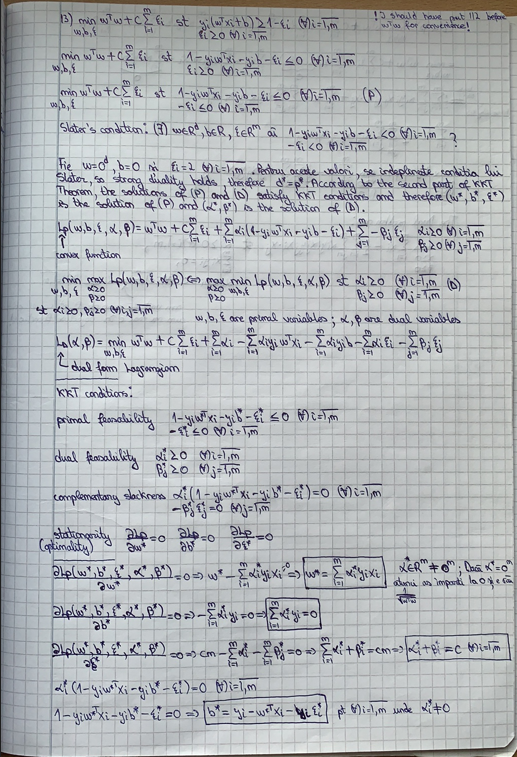

In [69]:
from IPython.display import Image
Image(filename=r"/content/drive/MyDrive/Customers/svm_1.png", width=600, height=900)

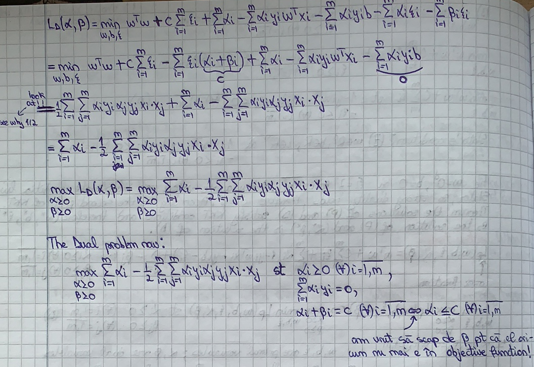

In [70]:
Image(filename=r"/content/drive/MyDrive/Customers/svm_2.png", width=600, height=600)

In [71]:
X_svm = copy.deepcopy(X_oversampled.loc[:, X_oversampled.dtypes.loc[X_oversampled.dtypes == "float64"].index]).sample(n=2000, ignore_index=False)

Y_svm = copy.deepcopy(pd.Series(y_oversampled).loc[X_svm.index])

maxi  = 0

for k_best in range(2, X_oversampled.dtypes.value_counts().loc[X_oversampled.dtypes.value_counts().index == "float64"].iloc[0] + 1):

  select_k_best = SelectKBest(score_func=f_classif, 
                              k=k_best).fit(X_svm, Y_svm)


  X_best_features = select_k_best.transform(X_svm)


  linear_svm = SVC(C=0.1, kernel="linear", probability=True, cache_size=1000, random_state=42)


  scores_linear_svm = cross_validate(estimator=linear_svm, 
                                     X=X_best_features, 
                                     y=Y_svm, 
                                     scoring=["recall", "precision", "accuracy"], 
                                     cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=5), 
                                     return_train_score=True,
                                     return_estimator=True)
  
  if scores_linear_svm["test_accuracy"].mean() > maxi:
    
    maxi = scores_linear_svm["test_accuracy"].mean()
    
    memorize_X_best_features_linear_svm = copy.deepcopy(X_oversampled.loc[:, select_k_best.get_feature_names_out()])
    
    best_linear_svm = scores_linear_svm['estimator'][np.argmax(scores_linear_svm['test_precision'])]
  
  print(f"""Mean test accuracy: {scores_linear_svm["test_accuracy"].mean()}, 
            Max test accuracy: {scores_linear_svm["test_accuracy"].max()}""")

Mean test accuracy: 0.5973999999999999, 
            Max test accuracy: 0.67
Mean test accuracy: 0.5576000000000001, 
            Max test accuracy: 0.675
Mean test accuracy: 0.5676, 
            Max test accuracy: 0.66
Mean test accuracy: 0.5622, 
            Max test accuracy: 0.65
Mean test accuracy: 0.5664, 
            Max test accuracy: 0.65
Mean test accuracy: 0.5618000000000001, 
            Max test accuracy: 0.645
Mean test accuracy: 0.5708999999999999, 
            Max test accuracy: 0.655
Mean test accuracy: 0.5638, 
            Max test accuracy: 0.63
Mean test accuracy: 0.5619000000000001, 
            Max test accuracy: 0.66
Mean test accuracy: 0.5607, 
            Max test accuracy: 0.625
Mean test accuracy: 0.5619999999999999, 
            Max test accuracy: 0.63
Mean test accuracy: 0.5750000000000001, 
            Max test accuracy: 0.64
Mean test accuracy: 0.5692999999999999, 
            Max test accuracy: 0.625
Mean test accuracy: 0.5741999999999999, 
            M

In [93]:
print("Best SVM with linear kernel results:")

linear_svm_predictions = best_linear_svm.predict(customers_df_test_scaled.loc[:, memorize_X_best_features_linear_svm.columns].to_numpy())

metrics_report(real_output=customers_df_test_scaled.loc[:, "churn"].to_numpy(), predicted_output=linear_svm_predictions)

Best SVM with linear kernel results:
Number of mislabeled points out of a total 12433 points : 5717
The accuracy score is : 0.540175
[[4285 4603]
 [1114 2431]]
              precision    recall  f1-score   support

       False       0.79      0.48      0.60      8888
        True       0.35      0.69      0.46      3545

    accuracy                           0.54     12433
   macro avg       0.57      0.58      0.53     12433
weighted avg       0.67      0.54      0.56     12433

Balanced accuacy score:  0.5839326474960613


In [73]:
maxi  = 0

for k_best in range(2, X_oversampled.dtypes.value_counts().loc[X_oversampled.dtypes.value_counts().index == "float64"].iloc[0] + 1):

  select_k_best = SelectKBest(score_func=f_classif, 
                              k=k_best).fit(X_svm, Y_svm)


  X_best_features = select_k_best.transform(X_svm)


  poly_svm = SVC(C=0.1, kernel="poly", degree=2, probability=True, cache_size=1000, random_state=42)

  scores_poly_svm = cross_validate(estimator=poly_svm, 
                                     X=X_best_features, 
                                     y=Y_svm, 
                                     scoring=["recall", "precision", "accuracy"], 
                                     cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=5), 
                                     return_train_score=True,
                                     return_estimator=True)
  
  if scores_poly_svm["test_accuracy"].mean() > maxi:
    
    maxi = scores_poly_svm["test_accuracy"].mean()
    
    memorize_X_best_features_poly_svm = copy.deepcopy(X_oversampled.loc[:, select_k_best.get_feature_names_out()])
    
    best_poly_svm = scores_poly_svm['estimator'][np.argmax(scores_poly_svm['test_precision'])]
  
  print(f"""Mean test accuracy: {scores_poly_svm["test_accuracy"].mean()}, 
            Max test accuracy: {scores_poly_svm["test_accuracy"].max()}""")

Mean test accuracy: 0.5134, 
            Max test accuracy: 0.525
Mean test accuracy: 0.5869999999999999, 
            Max test accuracy: 0.635
Mean test accuracy: 0.5833999999999999, 
            Max test accuracy: 0.65
Mean test accuracy: 0.5784999999999999, 
            Max test accuracy: 0.64
Mean test accuracy: 0.5742, 
            Max test accuracy: 0.615
Mean test accuracy: 0.5770000000000001, 
            Max test accuracy: 0.62
Mean test accuracy: 0.5642, 
            Max test accuracy: 0.61
Mean test accuracy: 0.5617, 
            Max test accuracy: 0.615
Mean test accuracy: 0.5538, 
            Max test accuracy: 0.595
Mean test accuracy: 0.5421, 
            Max test accuracy: 0.575
Mean test accuracy: 0.5521, 
            Max test accuracy: 0.6
Mean test accuracy: 0.5468999999999999, 
            Max test accuracy: 0.59
Mean test accuracy: 0.5363, 
            Max test accuracy: 0.585
Mean test accuracy: 0.532, 
            Max test accuracy: 0.565
Mean test accuracy: 0.52

In [92]:
print("Best SVM with polynomial kernel results:")

poly_svm_predictions = best_poly_svm.predict(customers_df_test_scaled.loc[:, memorize_X_best_features_poly_svm.columns].to_numpy())

metrics_report(real_output=customers_df_test_scaled.loc[:, "churn"].to_numpy(), predicted_output=poly_svm_predictions)

Best SVM with polynomial kernel results:
Number of mislabeled points out of a total 12433 points : 6880
The accuracy score is : 0.446634
[[2668 6220]
 [ 660 2885]]
              precision    recall  f1-score   support

       False       0.80      0.30      0.44      8888
        True       0.32      0.81      0.46      3545

    accuracy                           0.45     12433
   macro avg       0.56      0.56      0.45     12433
weighted avg       0.66      0.45      0.44     12433

Balanced accuacy score:  0.5570011514550608


In [75]:
for k_best in range(2, X_oversampled.dtypes.value_counts().loc[X_oversampled.dtypes.value_counts().index == "float64"].iloc[0] + 1):

  select_k_best = SelectKBest(score_func=f_classif, 
                              k=k_best).fit(X_svm, Y_svm)


  X_best_features = select_k_best.transform(X_svm)


  rbf_svm = SVC(C=0.1, kernel="rbf", gamma=0.2, degree=2, probability=True, cache_size=1000, random_state=42)

  scores_rbf_svm = cross_validate(estimator=rbf_svm, 
                                     X=X_best_features, 
                                     y=Y_svm, 
                                     scoring=["recall", "precision", "accuracy"], 
                                     cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=5), 
                                     return_train_score=True,
                                     return_estimator=True)
  
  if scores_rbf_svm["test_accuracy"].mean() > maxi:
    
    maxi = scores_rbf_svm["test_accuracy"].mean()
    
    memorize_X_best_features_rbf_svm = copy.deepcopy(X_oversampled.loc[:, select_k_best.get_feature_names_out()])
    
    best_rbf_svm = scores_rbf_svm['estimator'][np.argmax(scores_rbf_svm['test_precision'])]
  
  print(f"""Mean test accuracy: {scores_rbf_svm["test_accuracy"].mean()}, 
            Max test accuracy: {scores_rbf_svm["test_accuracy"].max()}""")

Mean test accuracy: 0.5971, 
            Max test accuracy: 0.665
Mean test accuracy: 0.6018, 
            Max test accuracy: 0.65
Mean test accuracy: 0.606, 
            Max test accuracy: 0.675
Mean test accuracy: 0.6018, 
            Max test accuracy: 0.695
Mean test accuracy: 0.601, 
            Max test accuracy: 0.67
Mean test accuracy: 0.6062, 
            Max test accuracy: 0.675
Mean test accuracy: 0.6121, 
            Max test accuracy: 0.71
Mean test accuracy: 0.6097, 
            Max test accuracy: 0.695
Mean test accuracy: 0.6052, 
            Max test accuracy: 0.675
Mean test accuracy: 0.6023000000000001, 
            Max test accuracy: 0.66
Mean test accuracy: 0.6038999999999999, 
            Max test accuracy: 0.685
Mean test accuracy: 0.5978, 
            Max test accuracy: 0.67
Mean test accuracy: 0.596, 
            Max test accuracy: 0.655
Mean test accuracy: 0.5923999999999999, 
            Max test accuracy: 0.65
Mean test accuracy: 0.5888, 
            Max test

In [91]:
print("Best SVM with RBF kernel results:")

rbf_svm_predictions = best_rbf_svm.predict(customers_df_test_scaled.loc[:, memorize_X_best_features_rbf_svm.columns].to_numpy())

metrics_report(real_output=customers_df_test_scaled.loc[:, "churn"].to_numpy(), predicted_output=rbf_svm_predictions)

Best SVM with RBF kernel results:
Number of mislabeled points out of a total 12433 points : 5990
The accuracy score is : 0.518218
[[3874 5014]
 [ 976 2569]]
              precision    recall  f1-score   support

       False       0.80      0.44      0.56      8888
        True       0.34      0.72      0.46      3545

    accuracy                           0.52     12433
   macro avg       0.57      0.58      0.51     12433
weighted avg       0.67      0.52      0.53     12433

Balanced accuacy score:  0.5802756192403443


# d) <font color="green"> Artificial Neural Network </font> 

In [103]:
"""
  This is a custom ANN written by me 
"""
class ANN:
    
    
    def __init__(self, train, valid, test, batch_size, epochs, learning_rate, nr_labels, neurons_per_layer: list, activation, 
                 optimizer, regularization, lambd, dropout):
        
        self.batch_size = batch_size; self.epochs = epochs; self.etha = learning_rate; self.nr_labels = nr_labels
        self.neurons_per_layer = neurons_per_layer
        
        self.X_train = train[0]; self.Y_train = self.reshape_Y(train[1])
        self.X_valid = valid[0]; self.Y_valid = self.reshape_Y(valid[1])
        self.X_test = test[0];   self.Y_test = self.reshape_Y(test[1])
        self.activation = activation; self.optimizer = optimizer.lower()
        self.regularization = regularization; self.lambd = lambd
        
        if dropout is not None:
            for key in dropout.keys():
                dropout[key] = np.random.random_integers(low=0, high=self.neurons_per_layer[key]-1,
                                                         size=(int)(dropout[key] * self.neurons_per_layer[key]))
        self.dropout = dropout
        
        self.batches = self.split_in_batches(self.X_train, self.Y_train, self.batch_size)
        
        self.a = [None for _ in range(0, len(self.neurons_per_layer))]
        self.W = [np.random.normal(0, np.sqrt(1/self.neurons_per_layer[i]), (self.neurons_per_layer[i+1], self.neurons_per_layer[i]))
                  for i in range(0, len(self.neurons_per_layer) - 1)]
        self.W.insert(0, None)
        
        if self.optimizer == 'momentum':
            self.gamma, self.history = self.auxiliar_vars('momentum')
        elif self.optimizer == 'adagrad':
            self.epsilon, self.history = self.auxiliar_vars('adagrad')
        elif self.optimizer == 'rmsprop':
            self.epsilon, self.beta, self.history = self.auxiliar_vars('rmsprop')
    
    
    def auxiliar_vars(self, optimizer):
        history = [0 for _ in range(0, len(self.W))]
        epsilon = 0.01
        if optimizer == 'momentum':
            gamma = 0.9
            return (gamma, history)
        if optimizer == 'rmsprop':
            beta = 0.99
            return (epsilon, beta, history)
        return (epsilon, history)
    
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def sigmoid_deriv(self, a):
        return np.multiply(a, (1 - a))
    
    
    def tanh(self, z):
        return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    
    
    def tanh_deriv(self, z):
        return 1 - self.tanh(z) ** 2
    
    
    def relu(self, z):
        return np.array([list(map(lambda elem : 0 if elem <= 0 else elem, line)) for line in z])
    
    
    def relu_deriv(self, a):
        return np.array([list(map(lambda elem: 0 if elem == 0 else 1, line)) for line in a])
    
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    
    def softmax_deriv(self, a):
        return np.multiply(a, 1 - a)
    
    
    def logistic_loss(self, last_layer, real_outputs):
        rez = 0 - np.multiply(real_outputs, np.log(last_layer)) + np.multiply((1 - real_outputs), np.log(1 - last_layer))
        return sum(np.sum(rez, axis=0))
    
    
    def logistic_loss_deriv(self, last_layer, real_outputs):
        return (last_layer - real_outputs) / np.multiply(last_layer, 1 - last_layer)
    
    
    def forward_propagation(self, X):
        self.a[0] = X
        for i in range(1, len(self.a) - 1):
            z = np.dot(self.W[i], self.a[i-1])
            if self.activation == 'sigmoid':
                self.a[i] = self.sigmoid(z)
            elif self.activation == 'tanh':
                self.a[i] = self.tanh(z)
            elif self.activation == 'relu':
                self.a[i] = self.relu(z)
        i += 1
        z = np.dot(self.W[i], self.a[i-1])
        self.a[i] = self.softmax(z)

        
    def back_propagation(self, real_outputs):
        W_before = copy.deepcopy(self.W)
        gradients = []
        error = (1 / self.batch_size) * (self.a[-1] - real_outputs)
        if self.regularization == 'L2':
            gradient = np.dot(error, self.a[-2].T) + self.lambd * (1 / self.batch_size) * self.W[-1]
        elif self.regularization == 'L1':
            gradient = np.dot(error, self.a[-2].T) + self.lambd * (1 / self.batch_size) * np.sign(self.W[-1])
        gradients.append(gradient)
        
        for i in range(len(self.a) - 2, 0, -1):
            if self.activation == 'sigmoid':
                error = np.multiply(np.dot(error.T, self.W[i+1]).T, self.sigmoid_deriv(self.a[i]))
            elif self.activation == 'tanh':
                error = np.multiply(np.dot(error.T, self.W[i+1]).T, self.tanh_deriv(self.a[i]))
            elif self.activation == 'relu':
                error = np.multiply(np.dot(error.T, self.W[i+1]).T, self.relu_deriv(self.a[i]))
            if self.regularization == 'L2':
                gradient = np.dot(error, self.a[i-1].T) + self.lambd * (1 / self.batch_size) * self.W[i]
            elif self.regularization == 'L1':
                gradient = np.dot(error, self.a[i-1].T) + self.lambd * (1 / self.batch_size) * np.sign(self.W[i])
            gradients.append(gradient)
        
        gradients = list(reversed(gradients))
        gradients.insert(0, None)
        
        for i in range(1, len(self.a)):
            if self.optimizer == 'momentum':
                self.history[i] = self.gamma * self.history[i] + self.etha * gradients[i]
                self.W[i] -= self.history[i]
            else:
                self.W[i] -=  (self.etha / np.sqrt(self.history[i] + self.epsilon)) * gradients[i]
                if self.optimizer == 'adagrad':
                    self.history[i] += gradients[i] ** 2
                elif self.optimizer == 'rmsprop':
                    self.history[i] = self.beta * self.history[i] + (1 - self.beta) * gradients[i] ** 2
        
        if self.dropout is not None:
            for i in range(1, len(self.a) - 1):
                if i in self.dropout.keys():
                    for neuron in self.dropout[i]:
                        self.W[i + 1][:, neuron] = copy.deepcopy(W_before[i + 1][:, neuron])
                        self.W[i][neuron, :] = copy.deepcopy(W_before[i][neuron, :])
        
        
    def fit(self):
        for epoch in range(0, self.epochs):
            for batch in self.batches:
                self.forward_propagation(batch[0])
                self.back_propagation(batch[1])
            self.accuracy(self.X_train, self.Y_train, "Train accuracy: ")
            self.accuracy(self.X_valid, self.Y_valid, "Valid accuracy: ")
    
    
    def accuracy(self, X, Y, msg):
        self.forward_propagation(X)
        real = np.argmax(Y, axis=0)
        predicted = np.argmax(self.a[-1], axis=0)
        nr = 0
        for i in range(0, real.size):
            if real[i] == predicted[i]:
                nr += 1
        print(msg + str(nr / X.shape[1]))
        return predicted
    
    
    def reshape_Y(self, vec):    
        new_Y = np.zeros((self.nr_labels, len(vec)))
        for i in range(0, len(vec)):
            new_Y[vec[i], i] = 1
        return new_Y
    
    
    def split_in_batches(self, X, Y, batch_size):
        batches = []
        for i in range(0, X.shape[1], batch_size):
            batches.append((X[:, i:i+batch_size], Y[:, i:i+batch_size]))
        return batches

    
if __name__ == "__main__":

    X_ANN = X_oversampled.loc[:, X_oversampled.dtypes.loc[(X_oversampled.dtypes == "uint8") | (X_oversampled.dtypes == "bool")].index.tolist()].applymap(lambda elem: 1 if elem == True else 0 if elem == False else elem).to_numpy()
    Y_ANN = y_oversampled

    X_ANN_train, X_ANN_test, Y_ANN_train, Y_ANN_test = train_test_split(X_ANN, Y_ANN, train_size=0.95, test_size=0.05, shuffle=True, stratify=Y_ANN)
    X_ANN_train = X_ANN_train.T
    X_ANN_test = X_ANN_test.T

    var = ANN((X_ANN_train, Y_ANN_train), (X_ANN_test, Y_ANN_test), (X_ANN_test, Y_ANN_test), 
              batch_size=10, 
              epochs=10, 
              learning_rate=0.1, 
              nr_labels=2, 
              neurons_per_layer=[X_ANN_train.shape[0], 100, 50, 25, 10, 5, 2], 
              activation='relu',
              optimizer='adagrad', 
              regularization='L2', 
              lambd=0.01, 
              dropout=None)
    
    var.fit()


    X_testare = customers_df_test_scaled.loc[:,  customers_df_test_scaled.dtypes.loc[(customers_df_test_scaled.dtypes == "uint8") | (customers_df_test_scaled.dtypes == "bool")].index.difference(["churn"]).tolist()].applymap(lambda elem: 1 if elem == True else 0 if elem == False else elem).to_numpy()
    Y_testare = customers_df_test_scaled.loc[:, "churn"].tolist()

    Y_testare = list(map(lambda elem: 1 if elem == True else 0, Y_testare))

    predicted = var.accuracy(X_testare.T, var.reshape_Y(Y_testare), "test accuracy ")

    metrics_report(real_output=customers_df_test_scaled.loc[:, "churn"].to_numpy(), predicted_output=predicted)

Train accuracy: 0.7777602024675736
Valid accuracy: 0.7915101427498121
Train accuracy: 0.7830196140461879
Valid accuracy: 0.79526671675432
Train accuracy: 0.7845223030686491
Valid accuracy: 0.7967693463561232
Train accuracy: 0.7871520088579563
Valid accuracy: 0.8001502629601803
Train accuracy: 0.7888721923441949
Valid accuracy: 0.8046581517655897
Train accuracy: 0.7907900980702309
Valid accuracy: 0.804282494365139
Train accuracy: 0.7918182537171781
Valid accuracy: 0.8057851239669421
Train accuracy: 0.7918182537171781
Valid accuracy: 0.8054094665664914
Train accuracy: 0.7921543815248339
Valid accuracy: 0.8039068369646882
Train accuracy: 0.7919764315090161
Valid accuracy: 0.804282494365139
test accuracy 0.7052199790879112
Number of mislabeled points out of a total 12433 points : 3665
The accuracy score is : 0.705220
[[8614  274]
 [3391  154]]
              precision    recall  f1-score   support

       False       0.72      0.97      0.82      8888
        True       0.36      0.04      

------------------------------- ROC Curve --------------------------------------------------------------


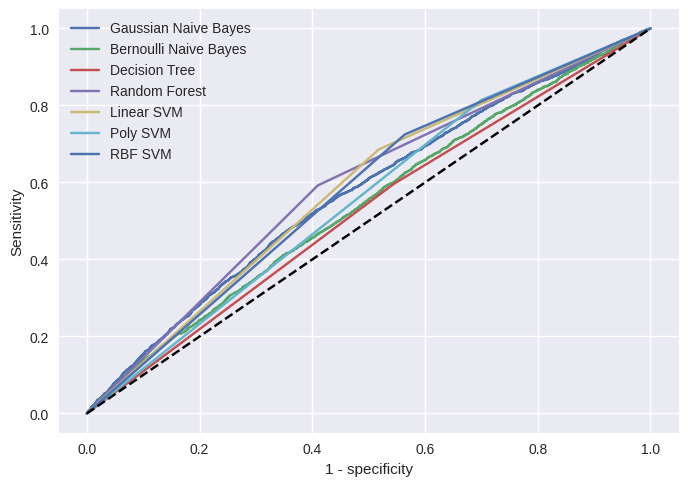

In [121]:
 
print("------------------------------- ROC Curve --------------------------------------------------------------")


best_gaussian_NB, best_bernoulli_NB, best_decision_tree, best_rf_estimator, best_linear_svm, best_poly_svm, best_rbf_svm

customers_df_test_scaled.loc[:, memorize_X_best_features_gaussian_nb.columns].to_numpy()


fpr, tpr, thresholds = roc_curve(customers_df_test_scaled.loc[:, "churn"].to_numpy(),          best_gaussian_NB.predict_proba(customers_df_test_scaled.loc[:, memorize_X_best_features_gaussian_nb.columns].to_numpy())[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(customers_df_test_scaled.loc[:, "churn"].to_numpy(),       best_bernoulli_NB.predict_proba(customers_df_test_scaled.loc[:, memorize_X_best_features_bernoulli_nb.columns].to_numpy())[:, 1])
fpr3, tpr3, thresholds3 = roc_curve(customers_df_test_scaled.loc[:, "churn"].to_numpy(),       best_decision_tree.predict(customers_df_test_scaled.loc[:, customers_df_test_scaled.columns.difference(["churn"])]))
fpr4, tpr4, thresholds4 = roc_curve(customers_df_test_scaled.loc[:, "churn"].to_numpy(),       best_rf_estimator.predict(customers_df_test_scaled.loc[:, X_random_forest.columns]))
fpr5, tpr5, thresholds5 = roc_curve(customers_df_test_scaled.loc[:, "churn"].to_numpy(),       best_linear_svm.predict(customers_df_test_scaled.loc[:, memorize_X_best_features_linear_svm.columns].to_numpy()))
fpr6, tpr6, tresholds6 = roc_curve(customers_df_test_scaled.loc[:, "churn"].to_numpy(),        best_poly_svm.predict(customers_df_test_scaled.loc[:, memorize_X_best_features_poly_svm.columns].to_numpy()))
fpr7, tpr7, tresholds7 = roc_curve(customers_df_test_scaled.loc[:, "churn"].to_numpy(),        best_rbf_svm.predict(customers_df_test_scaled.loc[:, memorize_X_best_features_rbf_svm.columns].to_numpy()))

plt.plot(fpr, tpr, label = "ROC curve")
plt.plot(fpr2, tpr2, label = "ROC curve")
plt.plot(fpr3, tpr3, label = "ROC curve")
plt.plot(fpr4, tpr4, label = "ROC curve")
plt.plot(fpr5, tpr5, label = "ROC curve")
plt.plot(fpr6, tpr6, label = "ROC curve")
plt.plot(fpr7, tpr7, label = "ROC curve")

plt.legend(["Gaussian Naive Bayes", "Bernoulli Naive Bayes", "Decision Tree", "Random Forest", "Linear SVM", "Poly SVM", "RBF SVM"])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("1 - specificity")
plt.ylabel("Sensitivity")
plt.show()